In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

# Humboldt

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Humboldt/BGC/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Humboldt/BGC


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_oxy_bgc_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(373150, 16)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Oxy,Oxy_adj,Ciclo,Id,Year,Month,Day
0,2005-11-11 14:00:23,-82.981,-38.079,8.300000,8.500000,14.094,14.094,33.933998,33.933998,NaN,275.491272,1,3900348,2005,11,11
1,2005-11-11 14:00:23,-82.981,-38.079,19.799999,20.000000,13.934,13.934,33.931999,33.931999,NaN,276.184052,1,3900348,2005,11,11
2,2005-11-11 14:00:23,-82.981,-38.079,29.600000,29.799999,13.855,13.855,33.931999,33.931999,NaN,276.592987,1,3900348,2005,11,11
3,2005-11-11 14:00:23,-82.981,-38.079,39.500000,39.700001,13.464,13.464,33.933998,33.933998,NaN,281.549194,1,3900348,2005,11,11
4,2005-11-11 14:00:23,-82.981,-38.079,49.500000,49.700001,13.151,13.151,33.922001,33.922001,NaN,282.516052,1,3900348,2005,11,11


In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(373150, 16)
(2862, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2005-11-11 14:00:23,-82.981,-38.079,1,11
68,2005-11-19 07:02:46,-82.991,-37.982,2,11
135,2005-11-26 22:05:46,-83.004,-37.886,3,11
202,2005-12-04 17:00:20,-83.044,-37.731,4,12
270,2005-12-12 07:54:21,-83.361,-37.607,5,12


In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 100
Mes:  2 87
Mes:  3 104
Mes:  4 103
Mes:  5 108
Mes:  6 95
Mes:  7 95
Mes:  8 84
Mes:  9 85
Mes:  10 104
Mes:  11 102
Mes:  12 112


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-85,-70+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-45,-15+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-100W , derecha -70°W, arriba -18°S, abajo -60°S
  x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [ ]:
lista_conteos[0].shape

(30, 15)

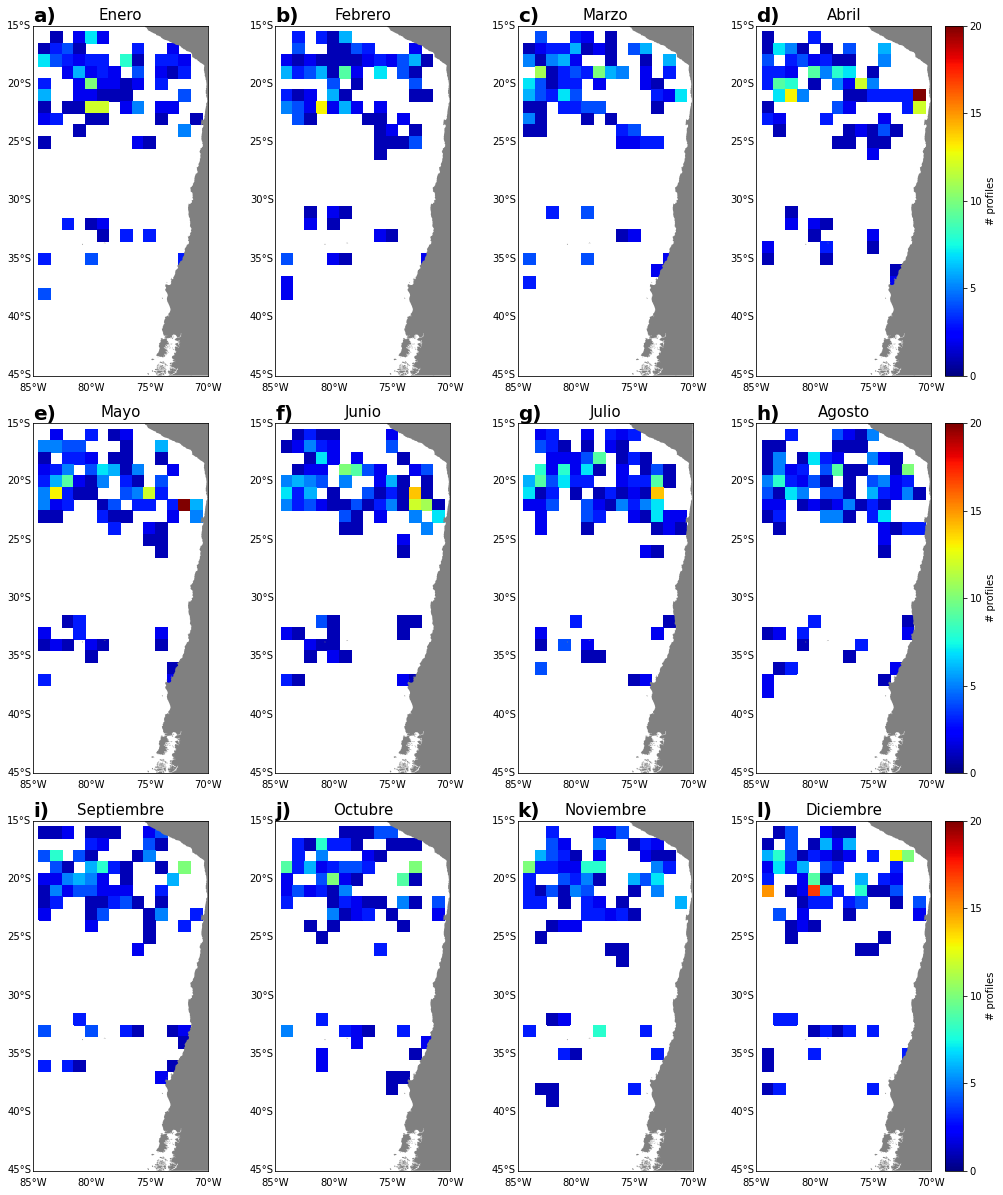

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.22
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/Humboldt/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_BIO.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/Humboldt


<xarray.Dataset>
Dimensions:    (month: 12, depth: 35, latitude: 121, longitude: 61)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 -45.0 -44.75 -44.5 ... -15.5 -15.25 -15.0
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 244.9 271.4 300.9
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    chl        (month, depth, latitude, longitude) float32 0.2875 0.2876 ... nan
    o2         (month, depth, latitude, longitude) float32 275.8 275.7 ... nan

**Filtro de 0 -300 dbar** (ARGO)

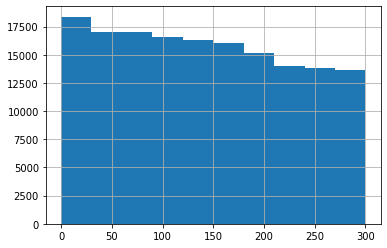

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 300]
ds_final.Pres_Adj.hist()

In [ ]:
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Oxy_adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (13120, 6)
Mes:  2 - Dimension: (12863, 6)
Mes:  3 - Dimension: (14099, 6)
Mes:  4 - Dimension: (13998, 6)
Mes:  5 - Dimension: (13823, 6)
Mes:  6 - Dimension: (12953, 6)
Mes:  7 - Dimension: (13671, 6)
Mes:  8 - Dimension: (13270, 6)
Mes:  9 - Dimension: (11016, 6)
Mes:  10 - Dimension: (10112, 6)
Mes:  11 - Dimension: (11923, 6)
Mes:  12 - Dimension: (17123, 6)


## Ejemplo de prueba para un mes (Interpolacion Akima)

------------------------------------
Id : 3900713
Ciclo 25 ......................... Check
Presion minima: 2
Presion maxima: 50
[225.01872253 225.03138655 225.02882385 225.01030169 224.98468018
 224.94346753 224.90768433 224.94907779 225.00097656 225.00585362
 225.00715637 225.00421486 225.00190735 225.01040889 225.02244568
 225.01069997 224.99714661 225.04414744 225.12791443 225.2590372
 225.43565369 225.75300424 226.7827301  230.28793228 234.49661255
 237.44556265 239.65011597 240.9109016  241.66311646 242.15811266
 242.4646759  242.58137329 242.69720459 242.81216565 242.92732239
 243.05005429 243.17614746 243.30543593 243.37490845 243.37734436
 243.37965393 243.38195606 243.3842926  243.39841075 243.41938782
 243.42620252 243.43321228 243.50357653 243.64241028]
Ciclo 24 ......................... Check
Presion minima: 2
Presion maxima: 50
[224.88456726 224.87881694 224.87104797 224.85787844 224.84368896
 224.9016394  224.96836853 224.90987416 224.86236572 224.89540704
 224.92811584 2

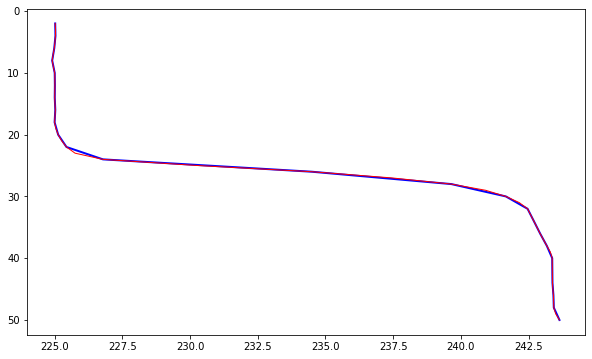

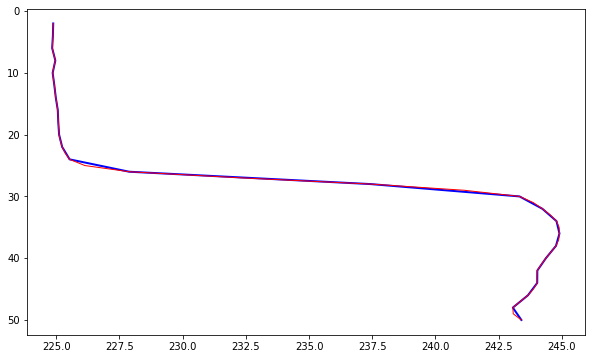

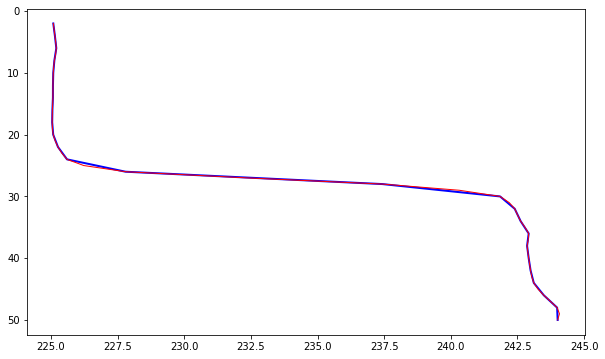

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion

# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=50)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    print(O_new)
    #################################################################
    # Grafica para chequear la interpolacion:
    plt.figure(figsize=(10,6))
    plt.plot(ds.Oxy_adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(O_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,50+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],51);df_ts['Lat']= np.repeat(lat_0[0],51)
    df_ts['Id']= np.repeat(id_0[0],51);df_ts['Ciclo']= np.repeat(ciclo_0[0],51);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Validacion-Enero

**Interpolacion cada 1m**

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_ene= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ene.Ciclo.unique()), df_final_ene.Ciclo.unique())
print('Ids unicos:', len(df_final_ene.Id.unique()),df_final_ene.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ene

Ciclos unicos: 100 [ 25  24  23 222 221 220 186 184 185  22  21  20  16  17  15  18 147 148
 149 112 111 113 104 105 106  11  10   9   8 150 152 151  32  65  66  67
  31  30  29  28 101 102 103  34  33  70  71  69  35 189 190 191 195 192
 194 193 116 117  48 121 118 120 119  47  46  45  44  43 159 158 157 115
  14  13  12 230 231 232  19 266 267 268  49  50  68  58  57  59  56  88
  89  90  91  92  93  99  98  97  96  95]
Ids unicos: 28 [3900713 3900729 3900348 3900715 6900874 6900875 6900530 6900532 6901461
 3900521 3900728 5905106 6900868 6900531 6900873 3900727 3900524 6900528
 3900347 6900870 3900515 6900872 3900523 6900869 5904663 5905105 3901067
 3901066]
Total de coordenadas unicas:  217


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-84.993,-19.026,3900713,25,NaN
1,1,-84.993,-19.026,3900713,25,NaN
2,2,-84.993,-19.026,3900713,25,225.018723
3,3,-84.993,-19.026,3900713,25,225.031387
4,4,-84.993,-19.026,3900713,25,225.028824
...,...,...,...,...,...,...
296,296,-72.562,-17.841,3901066,95,0.877301
297,297,-72.562,-17.841,3901066,95,0.880185
298,298,-72.562,-17.841,3901066,95,0.883090
299,299,-72.562,-17.841,3901066,95,0.886016


In [ ]:
lon_reanal=list(reanal.longitude.values)
lat_reanal=list(reanal.latitude.values)
from itertools import product
df_coords=pd.DataFrame(list(product(lon_reanal, lat_reanal)), columns=['lon', 'lat']).to_dict('records')
print(type(df_coords))
print(df_coords[0:5])
# Distancia de Haversine
from math import cos, asin, sqrt
'''
p is the factor to convert an angle expressed in degrees to radians: π/180 = 0.017453292519943295...
hav is the haversine calculated using the above formula
12742 is the diameter of the earth expressed in km, and is thus the value of 2𝑟 in the above formula.
'''
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

v = {'lat': -44.78, 'lon': -85.05} # funciona bien!
print(closest(df_coords, v))

<class 'list'>
[{'lon': -85.0, 'lat': -45.0}, {'lon': -85.0, 'lat': -44.75}, {'lon': -85.0, 'lat': -44.5}, {'lon': -85.0, 'lat': -44.25}, {'lon': -85.0, 'lat': -44.0}]
{'lon': -85.0, 'lat': -44.75}


**Ejemplo para mostrar**

(301, 6) [-34.512] [-80.073]
-34.5 -80.0


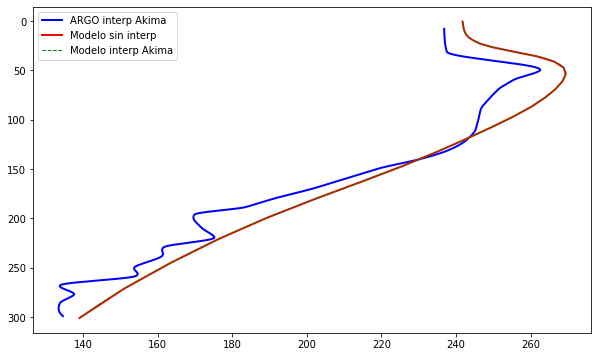

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo
  plt.figure(figsize=(10,6))
  plt.plot(ds.O_interp,ds.Presion_interp,color='b',linewidth=2, label='ARGO interp Akima')
  plt.plot(o2_orig,prof,color='r',linewidth=2, label='Modelo sin interp')
  plt.plot(O_fin,pres_nueva,color='g',linewidth=1,linestyle='--', label='Modelo interp Akima')
  plt.legend()
  plt.gca().invert_yaxis() # Bien!!

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo
  '''
  plt.figure(figsize=(10,6))
  plt.plot(ds.O_interp,ds.Presion_interp,color='b',linewidth=2, label='ARGO interp Akima')
  plt.plot(o2_orig,prof,color='r',linewidth=2, label='Modelo sin interp')
  plt.plot(O_fin,pres_nueva,color='g',linewidth=1,linestyle='--', label='Modelo interp Akima')
  plt.legend()
  plt.gca().invert_yaxis() # Bien!!
  '''

In [ ]:
print(len(dts)) ## de perfiles en total
t_ene= pd.concat(dts)
print(t_ene.shape)

217
(58184, 7)


In [ ]:
# Taylor diagram
def funcion_calculo_taylor(data):
  '''
  data= dataframe resultante de normalizacion
  '''
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  A_1 = A_1/DD_1
  STD_m_1= np.ma.std(P_1.ravel())
  CORRCOEF=np.ma.corrcoef(P_1.ravel(), A_1.ravel()).data[0,1]
  RMSE=np.sqrt(np.mean((P_1-A_1)**2))
  return STD_m_1, CORRCOEF, RMSE,A_1

In [ ]:
STD_1, CORR_1, RMSE_1,A_1= funcion_calculo_taylor(t_ene)
print(STD_1, CORR_1, RMSE_1)

0.7565444685047843 0.870777569749572 0.6708226713318999


## Validacion-Febrero

In [ ]:
############################################################################################################33
ids= list(lista_dfs[1].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[1].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[1][lista_dfs[1]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[1][(lista_dfs[1]['Id']==i) & (lista_dfs[1]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_feb= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_feb.Ciclo.unique()), df_final_feb.Ciclo.unique())
print('Ids unicos:', len(df_final_feb.Id.unique()),df_final_feb.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_feb

Ciclos unicos: 87 [ 12 107  13 108 110 109  15  14  33  34  35  36  37  38  39  41  40  73
  74  72  69  68  31  32 106 104 105  70 189 188 187  29  28  27  26  25
 152 151 150 114 115 116 200 198 197 196  54  53  52  51 127  50 126  49
 125 124 123 122 160 161 162 118  30 119 120  24  23  22 233 234 235 269
 270 271  62  60  61  98  97  96  95  94  21  16 113 111 112]
Ids unicos: 27 [3900348 3900715 6900527 6900530 6900875 6900874 3900729 6900868 6901461
 3900521 3900728 5905106 3900727 6900531 6900873 3900347 3900524 6900528
 3900515 6900872 6900532 6900870 6900869 3900523 5905105 5904663 3901067]
Total de coordenadas unicas:  203


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-84.824,-37.188,3900348,12,NaN
1,1,-84.824,-37.188,3900348,12,NaN
2,2,-84.824,-37.188,3900348,12,NaN
3,3,-84.824,-37.188,3900348,12,NaN
4,4,-84.824,-37.188,3900348,12,NaN
...,...,...,...,...,...,...
296,296,-72.924,-17.407,3901067,113,1.029610
297,297,-72.924,-17.407,3901067,113,1.033543
298,298,-72.924,-17.407,3901067,113,1.037489
299,299,-72.924,-17.407,3901067,113,1.041447


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_feb.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_feb[(df_final_feb['Id']==id) & (df_final_feb['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo
  '''
  plt.figure(figsize=(10,6))
  plt.plot(ds.O_interp,ds.Presion_interp,color='b',linewidth=2, label='ARGO interp Akima')
  plt.plot(o2_orig,prof,color='r',linewidth=2, label='Modelo sin interp')
  plt.plot(O_fin,pres_nueva,color='g',linewidth=1,linestyle='--', label='Modelo interp Akima')
  plt.legend()
  plt.gca().invert_yaxis() # Bien!!
  '''

In [ ]:
print(len(dts)) ## de perfiles en total
t_feb= pd.concat(dts)
print(t_feb.shape)

203
(54188, 7)


In [ ]:
STD_2, CORR_2, RMSE_2,A_2= funcion_calculo_taylor(t_feb)
print(STD_2, CORR_2, RMSE_2)

0.7718846333661573 0.8761433292903406 0.6396605530354339


## Validacion -Marzo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[2].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[2].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[2][lista_dfs[2]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[2][(lista_dfs[2]['Id']==i) & (lista_dfs[2]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_mar= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_mar.Ciclo.unique()), df_final_mar.Ciclo.unique())
print('Ids unicos:', len(df_final_mar.Id.unique()),df_final_mar.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_mar

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_mar.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_mar[(df_final_mar['Id']==id) & (df_final_mar['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo

In [ ]:
print(len(dts)) ## de perfiles en total
t_mar= pd.concat(dts)
print(t_mar.shape)

245
(65659, 7)


In [ ]:
STD_3, CORR_3, RMSE_3,A_3= funcion_calculo_taylor(t_mar)
print(STD_3, CORR_3, RMSE_3)

0.7701782724162614 0.869498571460797 0.6853440305203524


## Validacion-Abril

In [ ]:
############################################################################################################33
ids= list(lista_dfs[3].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[3].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[3][lista_dfs[3]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[3][(lista_dfs[3]['Id']==i) & (lista_dfs[3]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_abr= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_abr.Ciclo.unique()), df_final_abr.Ciclo.unique())
print('Ids unicos:', len(df_final_abr.Id.unique()),df_final_abr.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_abr

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_abr.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_abr[(df_final_abr['Id']==id) & (df_final_abr['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_abr= pd.concat(dts)
print(t_abr.shape)

265
(67847, 7)


In [ ]:
STD_4, CORR_4, RMSE_4,A_4= funcion_calculo_taylor(t_abr)
print(STD_4, CORR_4, RMSE_4)

0.7802577626529658 0.8576818890973239 0.7358570392281565


## Validacion- Mayo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[4].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[4].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[4][lista_dfs[4]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[4][(lista_dfs[4]['Id']==i) & (lista_dfs[4]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_may= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_may.Ciclo.unique()), df_final_may.Ciclo.unique())
print('Ids unicos:', len(df_final_may.Id.unique()),df_final_may.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_may

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_may.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_may[(df_final_may['Id']==id) & (df_final_may['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_may= pd.concat(dts)
print(t_may.shape)

269
(69457, 7)


In [ ]:
STD_5, CORR_5, RMSE_5,A_5= funcion_calculo_taylor(t_may)
print(STD_5, CORR_5, RMSE_5)

0.740012939121545 0.8375883711542974 0.7874190487541317


## Validacion-Junio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[5].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[5].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[5][lista_dfs[5]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[5][(lista_dfs[5]['Id']==i) & (lista_dfs[5]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jun= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jun.Ciclo.unique()), df_final_jun.Ciclo.unique())
print('Ids unicos:', len(df_final_jun.Id.unique()),df_final_jun.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jun

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jun.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jun[(df_final_jun['Id']==id) & (df_final_jun['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jun= pd.concat(dts)
print(t_jun.shape)

259
(66901, 7)


In [ ]:
STD_6, CORR_6, RMSE_6,A_6= funcion_calculo_taylor(t_jun)
print(STD_6, CORR_6, RMSE_6)

0.7502968866691679 0.8380936059702082 0.7755500140627981


## Validacion -Julio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[6].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[6].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[6][lista_dfs[6]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[6][(lista_dfs[6]['Id']==i) & (lista_dfs[6]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jul= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jul.Ciclo.unique()), df_final_jul.Ciclo.unique())
print('Ids unicos:', len(df_final_jul.Id.unique()),df_final_jul.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jul

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jul.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jul[(df_final_jul['Id']==id) & (df_final_jul['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jul= pd.concat(dts)
print(t_jul.shape)

263
(68364, 7)


In [ ]:
STD_7, CORR_7, RMSE_7,A_7= funcion_calculo_taylor(t_jul)
print(STD_7, CORR_7, RMSE_7)

0.7559809606257609 0.8738296993282152 0.6902978614314238


## Validacion -Agosto

In [ ]:
############################################################################################################33
ids= list(lista_dfs[7].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[7].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[7][lista_dfs[7]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[7][(lista_dfs[7]['Id']==i) & (lista_dfs[7]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_ago= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ago.Ciclo.unique()), df_final_ago.Ciclo.unique())
print('Ids unicos:', len(df_final_ago.Id.unique()),df_final_ago.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ago

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ago.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ago[(df_final_ago['Id']==id) & (df_final_ago['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ago= pd.concat(dts)
print(t_ago.shape)

250
(64538, 7)


In [ ]:
STD_8, CORR_8, RMSE_8,A_8= funcion_calculo_taylor(t_ago)
print(STD_8, CORR_8, RMSE_8)

0.7788898292219469 0.8863252948101163 0.6009631173981833


## Validacion-Septiembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[8].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[8].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[8][lista_dfs[8]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[8][(lista_dfs[8]['Id']==i) & (lista_dfs[8]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_sep= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_sep.Ciclo.unique()), df_final_sep.Ciclo.unique())
print('Ids unicos:', len(df_final_sep.Id.unique()),df_final_sep.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_sep

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_sep.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_sep[(df_final_sep['Id']==id) & (df_final_sep['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_sep= pd.concat(dts)
print(t_sep.shape)

203
(54626, 7)


In [ ]:
STD_9, CORR_9, RMSE_9,A_9= funcion_calculo_taylor(t_sep)
print(STD_9, CORR_9, RMSE_9)

0.7823267067313597 0.889783541382715 0.6062850207052974


## Validacion-Octubre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[9].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[9].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[9][lista_dfs[9]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[9][(lista_dfs[9]['Id']==i) & (lista_dfs[9]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_oct= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_oct.Ciclo.unique()), df_final_oct.Ciclo.unique())
print('Ids unicos:', len(df_final_oct.Id.unique()),df_final_oct.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_oct

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_oct.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_oct[(df_final_oct['Id']==id) & (df_final_oct['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_oct= pd.concat(dts)
print(t_oct.shape)

205
(54270, 7)


In [ ]:
STD_10, CORR_10, RMSE_10,A_10= funcion_calculo_taylor(t_oct)
print(STD_10, CORR_10, RMSE_10)

0.7480551187643242 0.8883301938328952 0.6457129427397161


## Validacion-Noviembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[10].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[10].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[10][lista_dfs[10]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[10][(lista_dfs[10]['Id']==i) & (lista_dfs[10]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_nov= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_nov.Ciclo.unique()), df_final_nov.Ciclo.unique())
print('Ids unicos:', len(df_final_nov.Id.unique()),df_final_nov.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_nov

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_nov.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_nov[(df_final_nov['Id']==id) & (df_final_nov['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_nov= pd.concat(dts)
print(t_nov.shape)

218
(58033, 7)


In [ ]:
STD_11, CORR_11, RMSE_11,A_11= funcion_calculo_taylor(t_nov)
print(STD_11, CORR_11, RMSE_11)

0.7436104320228506 0.8608520742217515 0.688601144850933


## Validacion-Diciembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[11].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[11].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[11][lista_dfs[11]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[11][(lista_dfs[11]['Id']==i) & (lista_dfs[11]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_dec= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_dec.Ciclo.unique()), df_final_dec.Ciclo.unique())
print('Ids unicos:', len(df_final_dec.Id.unique()),df_final_dec.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_dec

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_dec.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_dec[(df_final_dec['Id']==id) & (df_final_dec['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_dec= pd.concat(dts)
print(t_dec.shape)

262
(70659, 7)


In [ ]:
STD_12, CORR_12, RMSE_12,A_12= funcion_calculo_taylor(t_dec)
print(STD_12, CORR_12, RMSE_12)

0.7789702299525744 0.8630545869584211 0.6672060045202357


In [ ]:
STD= [STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12]
CORR= [CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12]
RMSE= [RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12]
MES=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sept','Oct','Nov','Dec']
dfr=pd.DataFrame({'STD':STD,'CORR':CORR,'RMSE':RMSE,'Mes':MES})
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Oxigeno_Humboldt.csv',index=False)
dfr

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


,STD,CORR,RMSE,Mes
0,0.756544,0.870778,0.670823,Ene
1,0.771885,0.876143,0.639661,Feb
2,0.770178,0.869499,0.685344,Mar
3,0.780258,0.857682,0.735857,Abr
4,0.740013,0.837588,0.787419,May
5,0.750297,0.838094,0.775550,Jun
6,0.755981,0.873830,0.690298,Jul
7,0.778890,0.886325,0.600963,Ago
8,0.782327,0.889784,0.606285,Sept
9,0.748055,0.888330,0.645713,Oct


## Diagrama de Taylor

In [2]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [24]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Oxigeno_Humboldt.csv')
import matplotlib.pyplot as plt
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
dfr

,STD,CORR,RMSE,Mes
0,0.756544,0.870778,0.670823,Ene
1,0.771885,0.876143,0.639661,Feb
2,0.770178,0.869499,0.685344,Mar
3,0.780258,0.857682,0.735857,Abr
4,0.740013,0.837588,0.787419,May
5,0.750297,0.838094,0.775550,Jun
6,0.755981,0.873830,0.690298,Jul
7,0.778890,0.886325,0.600963,Ago
8,0.782327,0.889784,0.606285,Sept
9,0.748055,0.888330,0.645713,Oct


In [25]:
STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12= dfr.STD.values
CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12= dfr.CORR.values
RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12= dfr.RMSE.values

Text(1.0, 0.21, 'RMSE')

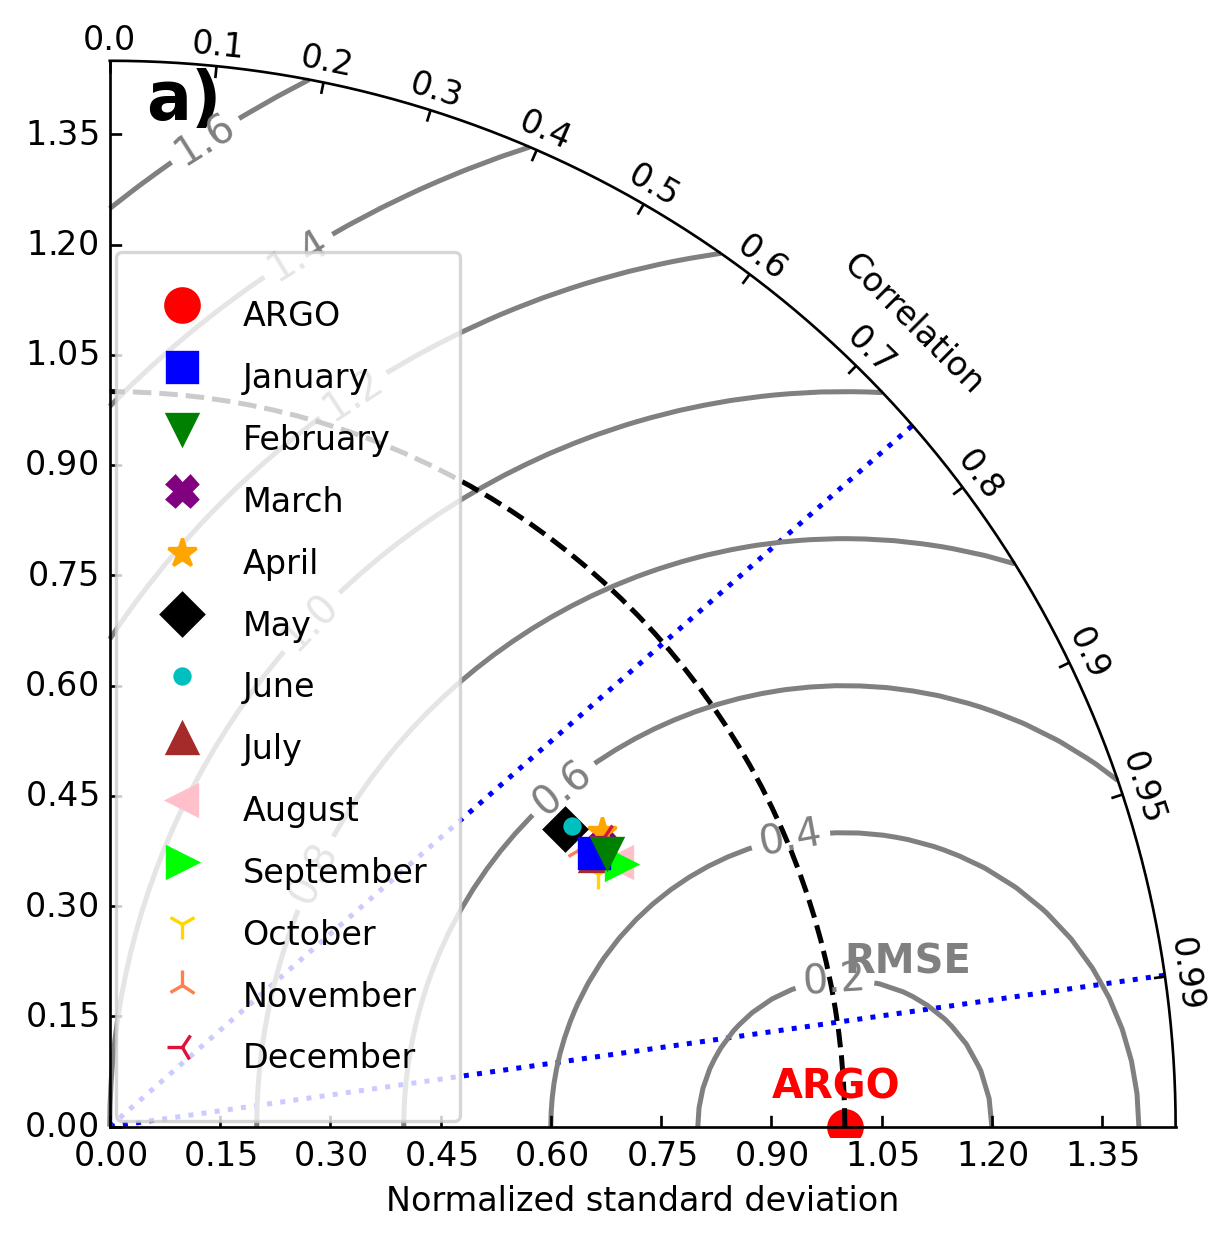

In [26]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0, 1.45), label='ARGO')
ttt=TayDia.add_sample(STD_1, CORR_1, marker='s', linestyle='None', color='b', ms=9,label='January')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_2, CORR_2, marker='v', linestyle='None', color='g', ms=9,label='February')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_3, CORR_3, marker='X', linestyle='None', color='purple', ms=9,label='March')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_4, CORR_4, marker='*', linestyle='None', color='orange', ms=9,label='April')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_5, CORR_5, marker='D', linestyle='None', color='k', ms=9,label='May')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_6, CORR_6, marker='.', linestyle='None', color='c', ms=9,label='June')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_7, CORR_7, marker='^', linestyle='None', color='brown', ms=9,label='July')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_8, CORR_8, marker='<', linestyle='None', color='pink', ms=9,label='August')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_9, CORR_9, marker='>', linestyle='None', color='lime', ms=9,label='September')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_10, CORR_10, marker='1', linestyle='None', color='gold', ms=9,label='October')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_11, CORR_11, marker='2', linestyle='None', color='coral', ms=9,label='November')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_12, CORR_12, marker='3', linestyle='None', color='crimson', ms=9,label='December')#, ax=axs.ravel()[i])
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(prop=dict(size='medium'), loc='lower left',borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05)
#plt.legend(label='JAN',  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.90,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.37,'a)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

Se observa una desviacion estandar (variabilidad) menor para los datos del producto de reanalisis, con correlaciones altas entre 0.8 y 0.92 y con valores de RMSE entre 0.4 y 0.6

# California

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/California/BGC/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/California/BGC


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_oxy_bgc_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(63167, 16)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Oxy,Oxy_adj,Ciclo,Id,Year,Month,Day
0,2006-01-09 11:31:59,-129.949005,47.599998,4.600000,4.600000,9.407,9.407,32.277000,32.335999,282.232117,286.021576,32,4900637,2006,1,9
1,2006-01-09 11:31:59,-129.949005,47.599998,9.100000,9.100000,9.407,9.407,32.278000,32.337002,282.036682,285.823517,32,4900637,2006,1,9
2,2006-01-09 11:31:59,-129.949005,47.599998,19.299999,19.299999,9.441,9.441,32.291000,32.349998,280.986359,284.759064,32,4900637,2006,1,9
3,2006-01-09 11:31:59,-129.949005,47.599998,29.299999,29.299999,9.474,9.474,32.306000,32.365002,280.844086,284.614899,32,4900637,2006,1,9
4,2006-01-09 11:31:59,-129.949005,47.599998,38.799999,38.799999,9.479,9.479,32.308998,32.368000,280.490967,284.257050,32,4900637,2006,1,9


In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(63167, 16)
(905, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2006-01-09 11:31:59,-129.949005,47.599998,32,1
71,2006-01-19 11:16:00,-129.686996,47.511002,33,1
142,2006-01-29 12:05:00,-129.485992,47.547001,34,1
213,2006-02-08 12:32:59,-129.602005,47.529999,35,2
283,2006-02-18 12:11:00,-129.431000,47.432999,36,2


In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 65
Mes:  2 77
Mes:  3 84
Mes:  4 72
Mes:  5 72
Mes:  6 67
Mes:  7 77
Mes:  8 84
Mes:  9 58
Mes:  10 61
Mes:  11 56
Mes:  12 61


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-130,-110+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(20,50+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-100W , derecha -70°W, arriba -18°S, abajo -60°S
  x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [ ]:
lista_conteos[0].shape

(30, 20)

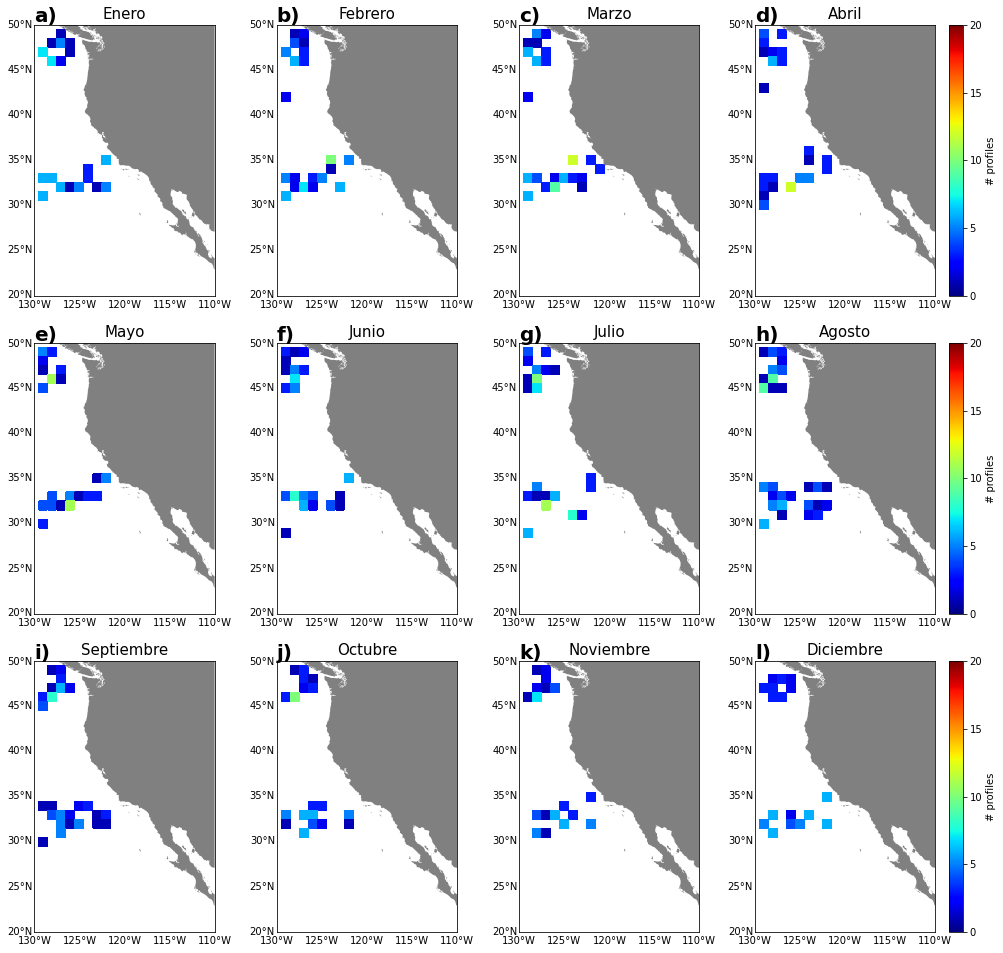

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-110,urcrnrlat=50, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,51,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115,-110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/California/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_BIO.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/California


<xarray.Dataset>
Dimensions:    (month: 12, depth: 35, latitude: 121, longitude: 81)
Coordinates:
  * longitude  (longitude) float32 -130.0 -129.8 -129.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 20.0 20.25 20.5 20.75 ... 49.5 49.75 50.0
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 244.9 271.4 300.9
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    chl        (month, depth, latitude, longitude) float32 0.04868 ... nan
    o2         (month, depth, latitude, longitude) float32 223.4 223.6 ... nan

**Filtro de 0 -300 dbar** (ARGO)

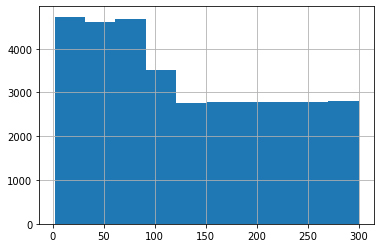

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 300]
ds_final.Pres_Adj.hist()

In [ ]:
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Oxy_adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (2633, 6)
Mes:  2 - Dimension: (2918, 6)
Mes:  3 - Dimension: (3213, 6)
Mes:  4 - Dimension: (2640, 6)
Mes:  5 - Dimension: (2737, 6)
Mes:  6 - Dimension: (2667, 6)
Mes:  7 - Dimension: (3413, 6)
Mes:  8 - Dimension: (3728, 6)
Mes:  9 - Dimension: (2908, 6)
Mes:  10 - Dimension: (2775, 6)
Mes:  11 - Dimension: (2175, 6)
Mes:  12 - Dimension: (2433, 6)


## Ejemplo de prueba para un mes (Interpolacion Akima)

Presion minima: 4
Presion maxima: 49
[         nan 286.01477439 285.98727437 285.94618829 285.89327673
 285.8303003  285.75191393 285.65197337 285.53621107 285.410454
 285.28052914 285.15226346 285.03148391 284.92401747 284.8356911
 284.77233178 284.73417825 284.70711028 284.68825401 284.67564513
 284.66731931 284.66131224 284.65565958 284.64839703 284.63756025
 284.62118494 284.59884304 284.57380597 284.54599419 284.5150704
 284.4806973  284.4425376  284.40025397 284.35350914 284.30196579
 284.24449815 284.15579697 284.02680866 283.8615607  283.66408057
 283.43839573 283.18853366 282.91852183 282.63238772 282.3341588
 282.02786255]
Presion minima: 4
Presion maxima: 50
[         nan 286.56005686 286.55339626 286.54737145 286.54185687
 286.53672696 286.53210613 286.52834716 286.52527152 286.52268459
 286.52039175 286.5181984  286.51590992 286.51333169 286.5102691
 286.50652754 286.50188894 286.49606133 286.48914118 286.48129964
 286.47270789 286.46353709 286.45395841 286.44414302 286.43

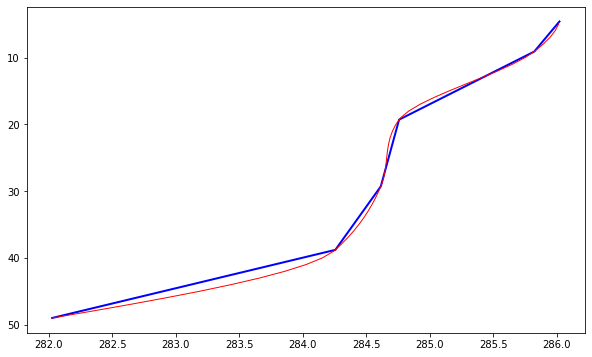

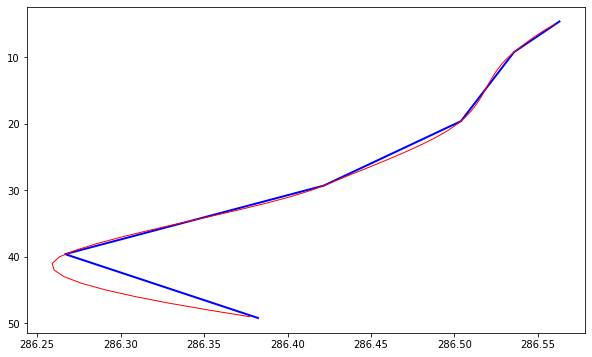

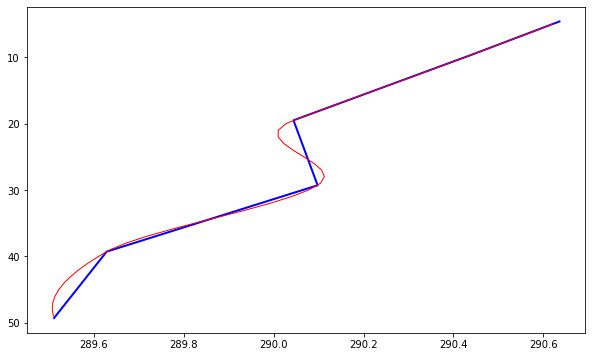

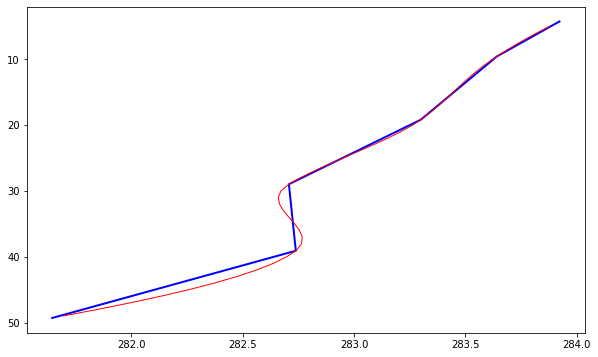

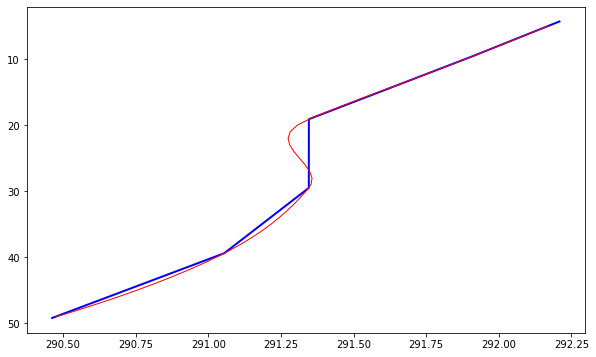

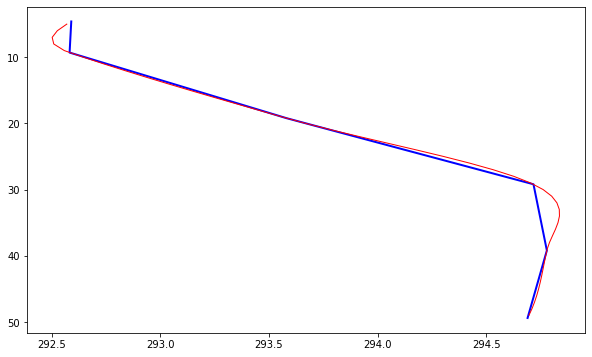

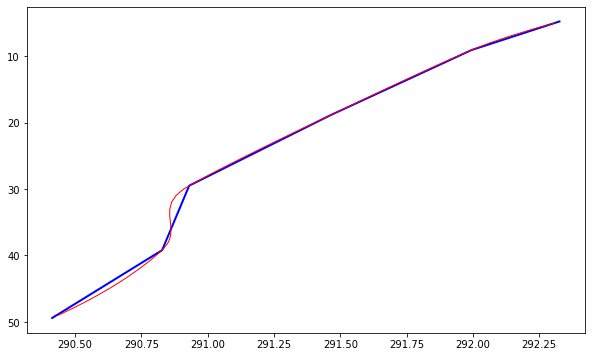

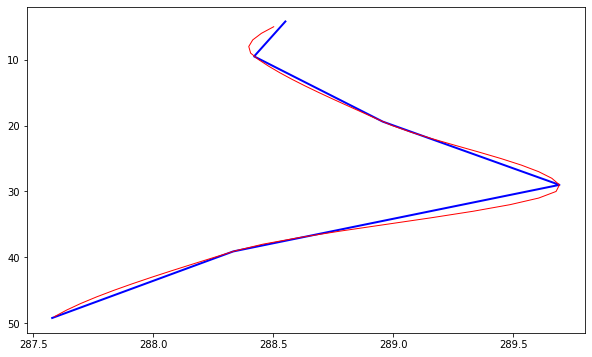

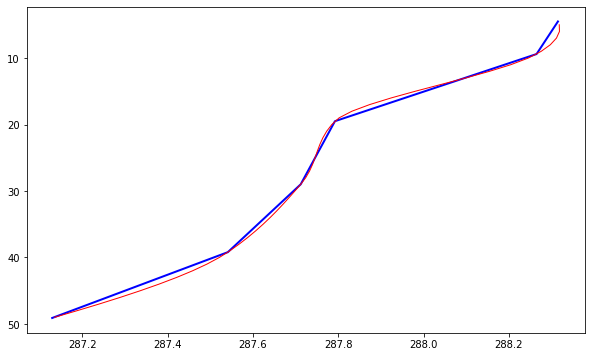

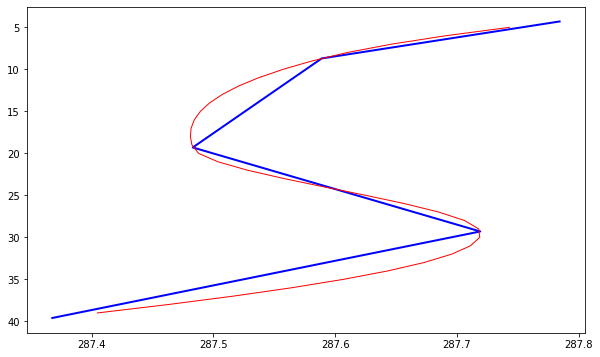

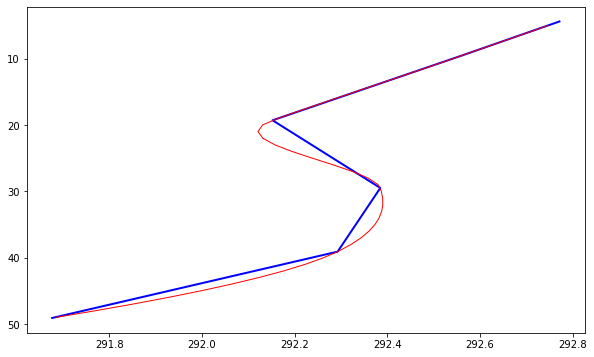

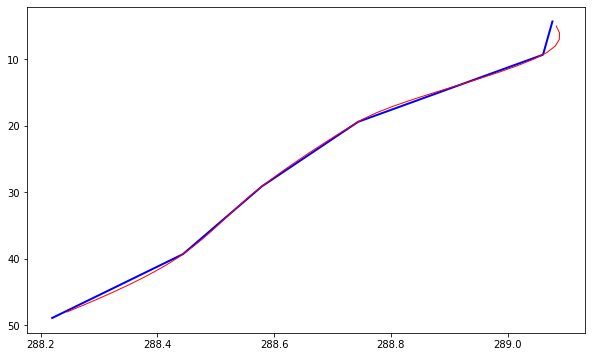

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion

# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=50)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    print(O_new)
    #################################################################
    # Grafica para chequear la interpolacion:
    plt.figure(figsize=(10,6))
    plt.plot(ds.Oxy_adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(O_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,50+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],51);df_ts['Lat']= np.repeat(lat_0[0],51)
    df_ts['Id']= np.repeat(id_0[0],51);df_ts['Ciclo']= np.repeat(ciclo_0[0],51);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Validacion-Enero

**Interpolacion cada 1m**

In [ ]:
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_ene= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ene.Ciclo.unique()), df_final_ene.Ciclo.unique())
print('Ids unicos:', len(df_final_ene.Id.unique()),df_final_ene.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ene

Ciclos unicos: 65 [ 32  33  34 105 106 143 107 142 141  68  70  69  60  61  59  58  95  97
  96 221 222 223 224 225 226 150 151 152 155 153 154  85  84  83  82  81
  80  10  11  12  13  15  14 250 249 248 247 246 245 180 179 178 177 176
 175 110 109 108  39  38  37  36  35  71  72]
Ids unicos: 5 [4900637 4901137 5904021 5904107 4901134]
Total de coordenadas unicas:  73


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-129.949005,47.599998,4900637,32,NaN
1,1,-129.949005,47.599998,4900637,32,NaN
2,2,-129.949005,47.599998,4900637,32,NaN
3,3,-129.949005,47.599998,4900637,32,NaN
4,4,-129.949005,47.599998,4900637,32,NaN
...,...,...,...,...,...,...
296,296,-127.707001,48.570000,4901134,36,NaN
297,297,-127.707001,48.570000,4901134,36,NaN
298,298,-127.707001,48.570000,4901134,36,NaN
299,299,-127.707001,48.570000,4901134,36,NaN


In [ ]:
lon_reanal=list(reanal.longitude.values)
lat_reanal=list(reanal.latitude.values)
from itertools import product
df_coords=pd.DataFrame(list(product(lon_reanal, lat_reanal)), columns=['lon', 'lat']).to_dict('records')
print(type(df_coords))
print(df_coords[0:5])
# Distancia de Haversine
from math import cos, asin, sqrt
'''
p is the factor to convert an angle expressed in degrees to radians: π/180 = 0.017453292519943295...
hav is the haversine calculated using the above formula
12742 is the diameter of the earth expressed in km, and is thus the value of 2𝑟 in the above formula.
'''
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

v = {'lat': -44.78, 'lon': -85.05} # funciona bien!
print(closest(df_coords, v))

<class 'list'>
[{'lon': -130.0, 'lat': 20.0}, {'lon': -130.0, 'lat': 20.25}, {'lon': -130.0, 'lat': 20.5}, {'lon': -130.0, 'lat': 20.75}, {'lon': -130.0, 'lat': 21.0}]
{'lon': -110.0, 'lat': 20.0}


**Ejemplo para mostrar**

(301, 6) [47.59999847] [-129.94900513]
47.5 -130.0


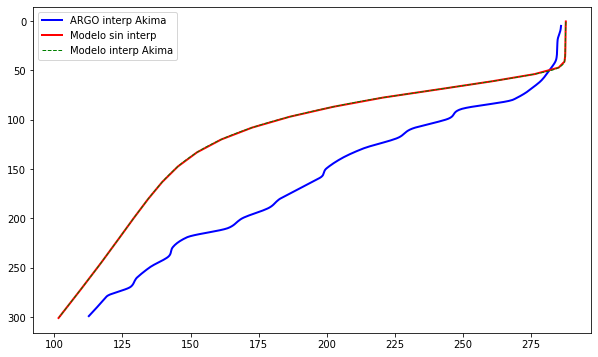

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo
  plt.figure(figsize=(10,6))
  plt.plot(ds.O_interp,ds.Presion_interp,color='b',linewidth=2, label='ARGO interp Akima')
  plt.plot(o2_orig,prof,color='r',linewidth=2, label='Modelo sin interp')
  plt.plot(O_fin,pres_nueva,color='g',linewidth=1,linestyle='--', label='Modelo interp Akima')
  plt.legend()
  plt.gca().invert_yaxis() # Bien!!

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ene= pd.concat(dts)
print(t_ene.shape)

73
(20865, 7)


In [ ]:
# Taylor diagram
def funcion_calculo_taylor(data):
  '''
  data= dataframe resultante de normalizacion
  '''
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  A_1 = A_1/DD_1
  STD_m_1= np.ma.std(P_1.ravel())
  CORRCOEF=np.ma.corrcoef(P_1.ravel(), A_1.ravel()).data[0,1]
  RMSE=np.sqrt(np.mean((P_1-A_1)**2))
  return STD_m_1, CORRCOEF, RMSE,A_1

In [ ]:
STD_1, CORR_1, RMSE_1,A_1= funcion_calculo_taylor(t_ene)
print(STD_1, CORR_1, RMSE_1)

0.9783566860923074 0.9171436350879552 0.40323215184116495


## Validacion-Febrero

In [ ]:
############################################################################################################33
ids= list(lista_dfs[1].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[1].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[1][lista_dfs[1]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[1][(lista_dfs[1]['Id']==i) & (lista_dfs[1]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    #print(O_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_feb= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_feb.Ciclo.unique()), df_final_feb.Ciclo.unique())
print('Ids unicos:', len(df_final_feb.Id.unique()),df_final_feb.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_feb

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_feb.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_feb[(df_final_feb['Id']==id) & (df_final_feb['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_feb= pd.concat(dts)
print(t_feb.shape)

81
(23028, 7)


In [ ]:
STD_2, CORR_2, RMSE_2,A_2= funcion_calculo_taylor(t_feb)
print(STD_2, CORR_2, RMSE_2)

1.0130450960217239 0.8738558444482573 0.5061160516086802


## Validacion -Marzo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[2].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[2].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[2][lista_dfs[2]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[2][(lista_dfs[2]['Id']==i) & (lista_dfs[2]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_mar= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_mar.Ciclo.unique()), df_final_mar.Ciclo.unique())
print('Ids unicos:', len(df_final_mar.Id.unique()),df_final_mar.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_mar

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_mar.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_mar[(df_final_mar['Id']==id) & (df_final_mar['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo

In [ ]:
print(len(dts)) ## de perfiles en total
t_mar= pd.concat(dts)
print(t_mar.shape)

89
(25397, 7)


In [ ]:
STD_3, CORR_3, RMSE_3,A_3= funcion_calculo_taylor(t_mar)
print(STD_3, CORR_3, RMSE_3)

1.013473727088363 0.8981179502317914 0.45479050672094234


## Validacion-Abril

In [ ]:
############################################################################################################33
ids= list(lista_dfs[3].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[3].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[3][lista_dfs[3]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[3][(lista_dfs[3]['Id']==i) & (lista_dfs[3]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_abr= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_abr.Ciclo.unique()), df_final_abr.Ciclo.unique())
print('Ids unicos:', len(df_final_abr.Id.unique()),df_final_abr.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_abr

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_abr.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_abr[(df_final_abr['Id']==id) & (df_final_abr['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_abr= pd.concat(dts)
print(t_abr.shape)

73
(20906, 7)


In [ ]:
STD_4, CORR_4, RMSE_4,A_4= funcion_calculo_taylor(t_abr)
print(STD_4, CORR_4, RMSE_4)

0.988045077336372 0.9125997151172592 0.41623913208759106


## Validacion- Mayo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[4].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[4].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[4][lista_dfs[4]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[4][(lista_dfs[4]['Id']==i) & (lista_dfs[4]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_may= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_may.Ciclo.unique()), df_final_may.Ciclo.unique())
print('Ids unicos:', len(df_final_may.Id.unique()),df_final_may.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_may

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_may.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_may[(df_final_may['Id']==id) & (df_final_may['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_may= pd.concat(dts)
print(t_may.shape)

75
(21481, 7)


In [ ]:
STD_5, CORR_5, RMSE_5,A_5= funcion_calculo_taylor(t_may)
print(STD_5, CORR_5, RMSE_5)

0.9954017450848677 0.8756268882442325 0.49765495447395536


## Validacion-Junio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[5].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[5].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[5][lista_dfs[5]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[5][(lista_dfs[5]['Id']==i) & (lista_dfs[5]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jun= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jun.Ciclo.unique()), df_final_jun.Ciclo.unique())
print('Ids unicos:', len(df_final_jun.Id.unique()),df_final_jun.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jun

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jun.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jun[(df_final_jun['Id']==id) & (df_final_jun['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jun= pd.concat(dts)
print(t_jun.shape)

73
(20928, 7)


In [ ]:
STD_6, CORR_6, RMSE_6,A_6= funcion_calculo_taylor(t_jun)
print(STD_6, CORR_6, RMSE_6)

0.9927460139566032 0.8930464695207427 0.46150235486237223


## Validacion -Julio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[6].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[6].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[6][lista_dfs[6]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[6][(lista_dfs[6]['Id']==i) & (lista_dfs[6]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jul= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jul.Ciclo.unique()), df_final_jul.Ciclo.unique())
print('Ids unicos:', len(df_final_jul.Id.unique()),df_final_jul.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jul

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jul.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jul[(df_final_jul['Id']==id) & (df_final_jul['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jul= pd.concat(dts)
print(t_jul.shape)

85
(24339, 7)


In [ ]:
STD_7, CORR_7, RMSE_7,A_7= funcion_calculo_taylor(t_jul)
print(STD_7, CORR_7, RMSE_7)

0.8878456249761211 0.8644089244101101 0.5033455063814833


## Validacion -Agosto

In [ ]:
############################################################################################################33
ids= list(lista_dfs[7].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[7].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[7][lista_dfs[7]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[7][(lista_dfs[7]['Id']==i) & (lista_dfs[7]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_ago= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ago.Ciclo.unique()), df_final_ago.Ciclo.unique())
print('Ids unicos:', len(df_final_ago.Id.unique()),df_final_ago.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ago

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ago.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ago[(df_final_ago['Id']==id) & (df_final_ago['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ago= pd.concat(dts)
print(t_ago.shape)

93
(26651, 7)


In [ ]:
STD_8, CORR_8, RMSE_8,A_8= funcion_calculo_taylor(t_ago)
print(STD_8, CORR_8, RMSE_8)

0.9127734923584577 0.8645254768378856 0.5065330978562668


## Validacion-Septiembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[8].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[8].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[8][lista_dfs[8]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[8][(lista_dfs[8]['Id']==i) & (lista_dfs[8]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_sep= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_sep.Ciclo.unique()), df_final_sep.Ciclo.unique())
print('Ids unicos:', len(df_final_sep.Id.unique()),df_final_sep.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_sep

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_sep.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_sep[(df_final_sep['Id']==id) & (df_final_sep['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_sep= pd.concat(dts)
print(t_sep.shape)

71
(20335, 7)


In [ ]:
STD_9, CORR_9, RMSE_9,A_9= funcion_calculo_taylor(t_sep)
print(STD_9, CORR_9, RMSE_9)

0.9177510625971794 0.870533215239247 0.49438931000121905


## Validacion-Octubre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[9].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[9].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[9][lista_dfs[9]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[9][(lista_dfs[9]['Id']==i) & (lista_dfs[9]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_oct= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_oct.Ciclo.unique()), df_final_oct.Ciclo.unique())
print('Ids unicos:', len(df_final_oct.Id.unique()),df_final_oct.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_oct

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_oct.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_oct[(df_final_oct['Id']==id) & (df_final_oct['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_oct= pd.concat(dts)
print(t_oct.shape)

68
(19449, 7)


In [ ]:
STD_10, CORR_10, RMSE_10,A_10= funcion_calculo_taylor(t_oct)
print(STD_10, CORR_10, RMSE_10)

0.9396025286450741 0.8999324824857337 0.4406093027987528


## Validacion-Noviembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[10].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[10].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[10][lista_dfs[10]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[10][(lista_dfs[10]['Id']==i) & (lista_dfs[10]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_nov= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_nov.Ciclo.unique()), df_final_nov.Ciclo.unique())
print('Ids unicos:', len(df_final_nov.Id.unique()),df_final_nov.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_nov

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_nov.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_nov[(df_final_nov['Id']==id) & (df_final_nov['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_nov= pd.concat(dts)
print(t_nov.shape)

57
(16292, 7)


In [ ]:
STD_11, CORR_11, RMSE_11,A_11= funcion_calculo_taylor(t_nov)
print(STD_11, CORR_11, RMSE_11)

0.9958984789511681 0.9030281570981332 0.4418516912075698


## Validacion-Diciembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[11].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[11].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[11][lista_dfs[11]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[11][(lista_dfs[11]['Id']==i) & (lista_dfs[11]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_dec= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_dec.Ciclo.unique()), df_final_dec.Ciclo.unique())
print('Ids unicos:', len(df_final_dec.Id.unique()),df_final_dec.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_dec

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_dec.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_dec[(df_final_dec['Id']==id) & (df_final_dec['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_dec= pd.concat(dts)
print(t_dec.shape)

67
(19110, 7)


In [ ]:
STD_12, CORR_12, RMSE_12,A_12= funcion_calculo_taylor(t_dec)
print(STD_12, CORR_12, RMSE_12)

1.002046956486553 0.9376316220875642 0.3535562713925269


In [ ]:
STD= [STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12]
CORR= [CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12]
RMSE= [RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12]
MES=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sept','Oct','Nov','Dec']
dfr=pd.DataFrame({'STD':STD,'CORR':CORR,'RMSE':RMSE,'Mes':MES})
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Oxigeno_California.csv',index=False)
dfr

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


,STD,CORR,RMSE,Mes
0,0.978357,0.917144,0.403232,Ene
1,1.013045,0.873856,0.506116,Feb
2,1.013474,0.898118,0.454791,Mar
3,0.988045,0.912600,0.416239,Abr
4,0.995402,0.875627,0.497655,May
5,0.992746,0.893046,0.461502,Jun
6,0.887846,0.864409,0.503346,Jul
7,0.912773,0.864525,0.506533,Ago
8,0.917751,0.870533,0.494389,Sept
9,0.939603,0.899932,0.440609,Oct


## Diagrama de Taylor

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [21]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Oxigeno_California.csv')
import matplotlib.pyplot as plt
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
dfr

,STD,CORR,RMSE,Mes
0,0.978357,0.917144,0.403232,Ene
1,1.013045,0.873856,0.506116,Feb
2,1.013474,0.898118,0.454791,Mar
3,0.988045,0.912600,0.416239,Abr
4,0.995402,0.875627,0.497655,May
5,0.992746,0.893046,0.461502,Jun
6,0.887846,0.864409,0.503346,Jul
7,0.912773,0.864525,0.506533,Ago
8,0.917751,0.870533,0.494389,Sept
9,0.939603,0.899932,0.440609,Oct


In [22]:
STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12= dfr.STD.values
CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12= dfr.CORR.values
RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12= dfr.RMSE.values

Text(1.0, 0.21, 'RMSE')

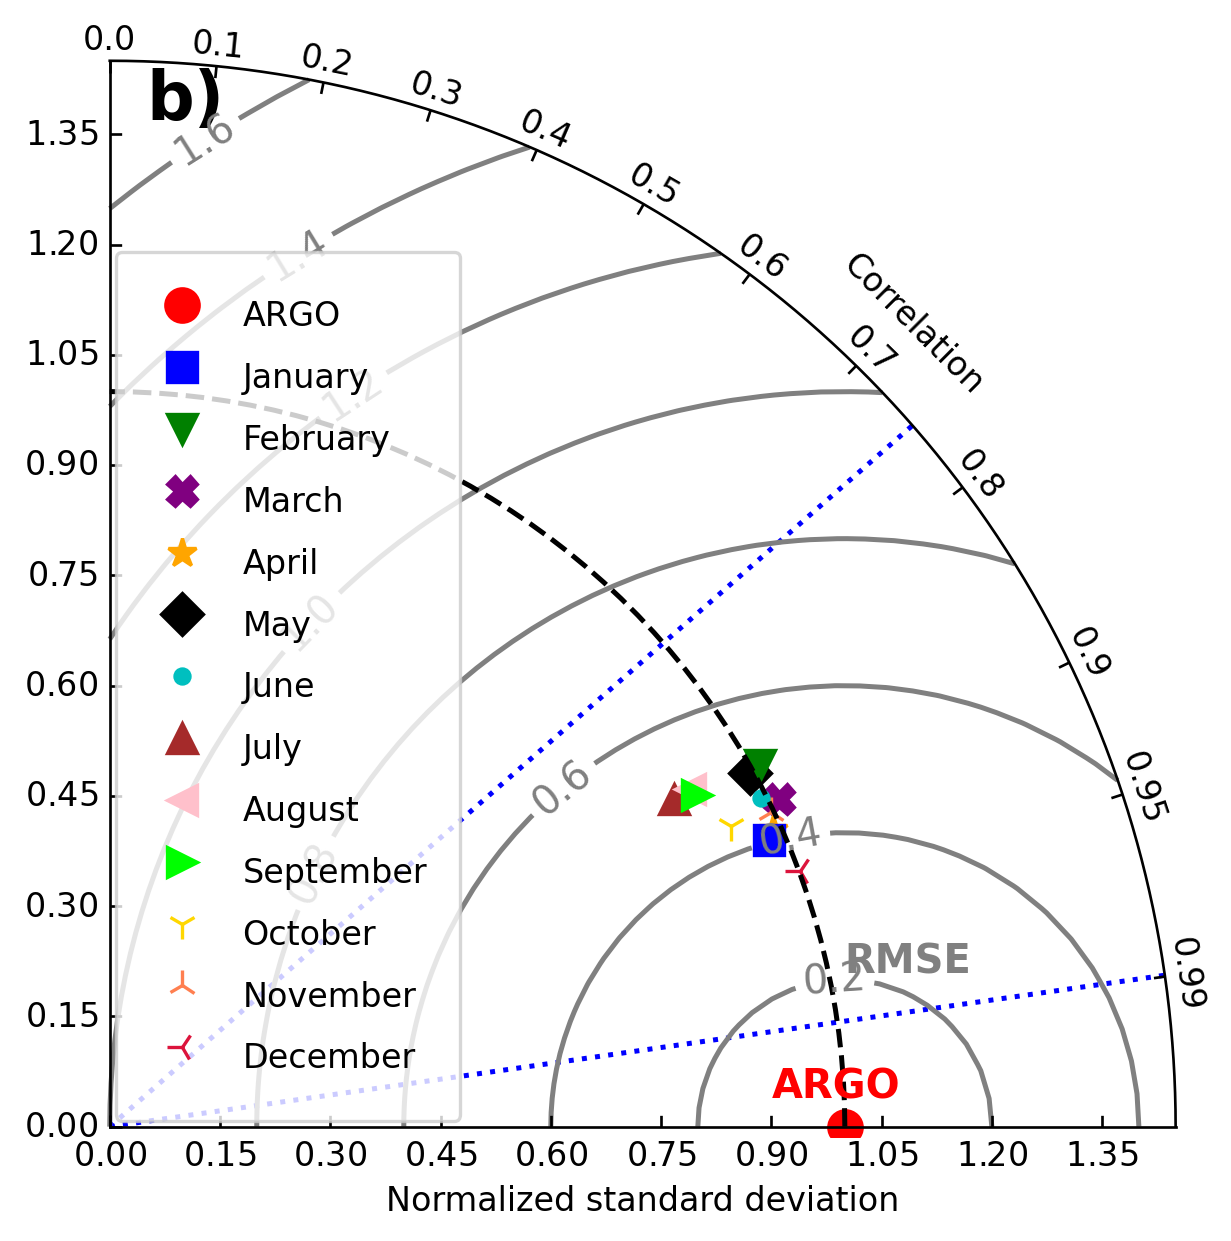

In [23]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0, 1.45), label='ARGO')
ttt=TayDia.add_sample(STD_1, CORR_1, marker='s', linestyle='None', color='b', ms=9,label='January')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_2, CORR_2, marker='v', linestyle='None', color='g', ms=9,label='February')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_3, CORR_3, marker='X', linestyle='None', color='purple', ms=9,label='March')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_4, CORR_4, marker='*', linestyle='None', color='orange', ms=9,label='April')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_5, CORR_5, marker='D', linestyle='None', color='k', ms=9,label='May')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_6, CORR_6, marker='.', linestyle='None', color='c', ms=9,label='June')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_7, CORR_7, marker='^', linestyle='None', color='brown', ms=9,label='July')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_8, CORR_8, marker='<', linestyle='None', color='pink', ms=9,label='August')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_9, CORR_9, marker='>', linestyle='None', color='lime', ms=9,label='September')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_10, CORR_10, marker='1', linestyle='None', color='gold', ms=9,label='October')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_11, CORR_11, marker='2', linestyle='None', color='coral', ms=9,label='November')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_12, CORR_12, marker='3', linestyle='None', color='crimson', ms=9,label='December')#, ax=axs.ravel()[i])
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(prop=dict(size='medium'), loc='lower left',borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05)
#plt.legend(label='JAN',  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.90,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.37,'b)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

# Canarias

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Canarias/BGC/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Canarias/BGC


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_oxy_bgc_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(206401, 16)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Oxy,Oxy_adj,Ciclo,Id,Year,Month,Day
0,2007-02-15 09:32:00,-24.277,17.763,0.0,0.0,NaN,NaN,NaN,NaN,NaN,220.117325,0,1900943,2007,2,15
1,2007-02-15 09:32:00,-24.277,17.763,6.0,6.0,22.511,NaN,NaN,NaN,NaN,218.468887,0,1900943,2007,2,15
2,2007-02-15 09:32:00,-24.277,17.763,16.0,16.0,22.486,22.486,36.202000,36.211685,NaN,216.846191,0,1900943,2007,2,15
3,2007-02-15 09:32:00,-24.277,17.763,25.0,25.0,22.458,22.458,36.222000,36.231686,NaN,213.519150,0,1900943,2007,2,15
4,2007-02-15 09:32:00,-24.277,17.763,36.0,36.0,22.278,22.278,36.365002,36.374687,NaN,195.701172,0,1900943,2007,2,15


In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(206401, 16)
(1798, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2007-02-15 09:32:00,-24.277,17.763,0,2
115,2007-02-13 19:06:00,-24.293,17.605,0,2
152,2007-02-20 09:26:00,-23.951,18.053,1,2
266,2007-02-25 09:20:00,-23.868,17.885,2,2
381,2007-03-02 09:26:00,-24.038,17.572,3,3


In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 62
Mes:  2 64
Mes:  3 66
Mes:  4 72
Mes:  5 73
Mes:  6 81
Mes:  7 81
Mes:  8 78
Mes:  9 81
Mes:  10 68
Mes:  11 60
Mes:  12 72


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-25,-5+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(15,45+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-100W , derecha -70°W, arriba -18°S, abajo -60°S
  x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [ ]:
lista_conteos[0].shape

(30, 20)

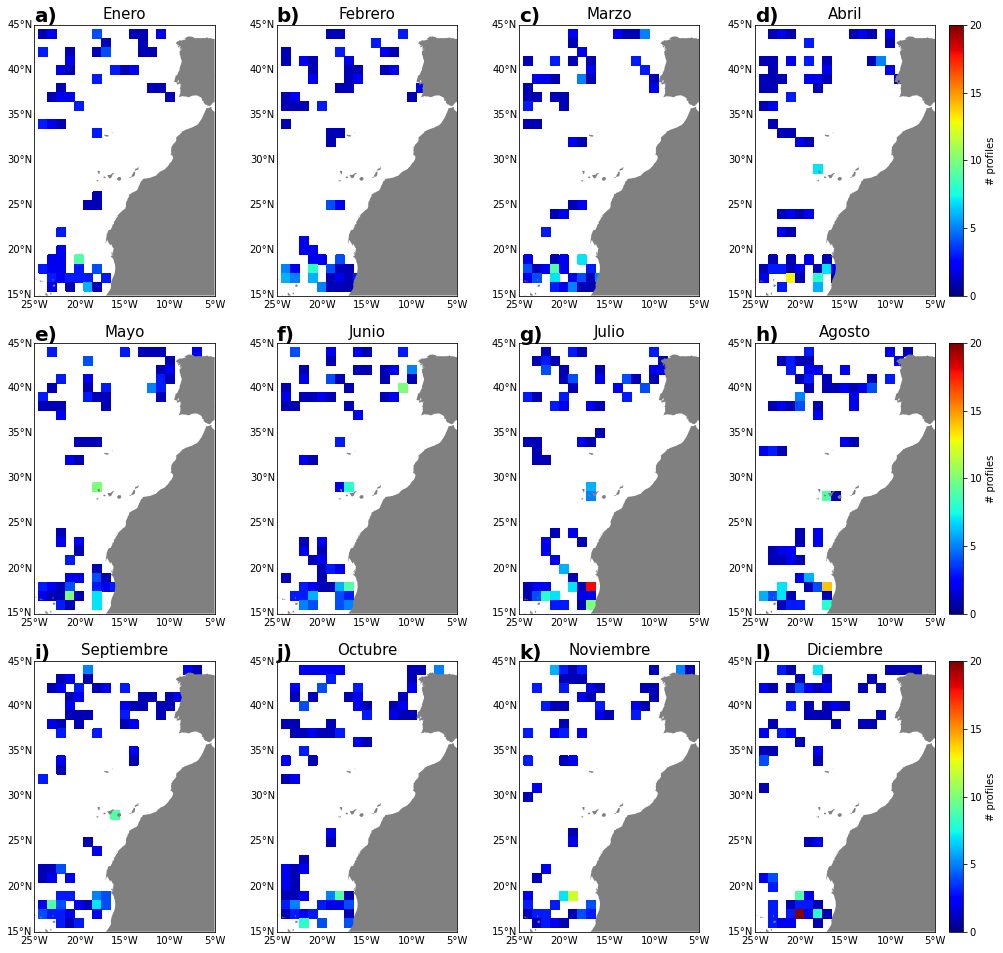

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-25,llcrnrlat=15,urcrnrlon=-5,urcrnrlat=45, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(15,46,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-25,-20,-15,-10,-5],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/Canarias/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_BIO.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/Canarias


<xarray.Dataset>
Dimensions:    (month: 12, depth: 35, latitude: 121, longitude: 81)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... -5.5 -5.25 -5.0
  * latitude   (latitude) float32 15.0 15.25 15.5 15.75 ... 44.5 44.75 45.0
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 244.9 271.4 300.9
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    chl        (month, depth, latitude, longitude) float32 0.3129 ... 0.008114
    o2         (month, depth, latitude, longitude) float32 215.5 215.8 ... 207.4

**Filtro de 0 -300 dbar** (ARGO)

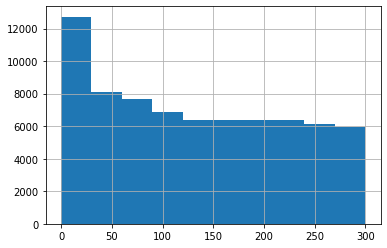

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 300]
ds_final.Pres_Adj.hist()

In [ ]:
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Oxy_adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (4546, 6)
Mes:  2 - Dimension: (4665, 6)
Mes:  3 - Dimension: (5077, 6)
Mes:  4 - Dimension: (5508, 6)
Mes:  5 - Dimension: (6487, 6)
Mes:  6 - Dimension: (6847, 6)
Mes:  7 - Dimension: (7625, 6)
Mes:  8 - Dimension: (7369, 6)
Mes:  9 - Dimension: (7193, 6)
Mes:  10 - Dimension: (5977, 6)
Mes:  11 - Dimension: (4910, 6)
Mes:  12 - Dimension: (6761, 6)


## Ejemplo de prueba para un mes (Interpolacion Akima)

Presion minima: 0
Presion maxima: 46
[233.82489014 233.83288574 233.8373567  233.84246826 233.8514099
 233.86122517 233.87020874 233.87811004 233.8860321  233.89425659
 233.90448463 233.914505   233.92227087 233.92999268 233.9379682
 233.94599915 233.95444017 233.96334167 233.972229   233.9773407
 233.9237871  233.78767276 233.61081181 233.43501843 233.30210677
 233.25389099 233.26197476 233.27008553 233.27822312 233.28638737
 233.29457811 233.30279514 233.31103831 233.31930743 233.32760234
 233.33592285 233.3442688  233.35262102 233.36096331 233.36929994
 233.37763518 233.3859733  233.39431856 233.40267524 233.4110476
 233.41943991 233.42785645]
Presion minima: 0
Presion maxima: 45
[234.66740417 233.91639709 233.92670595 233.93701172 233.94472621
 233.95243944 233.960495   233.96891982 233.97731018 233.98537644
 233.9934845  234.00236511 234.01064327 234.01887512 234.02800263
 234.03701782 234.04446829 234.05186462 234.06004749 234.06837463
 234.07683036 234.08531943 234.09383064 234.

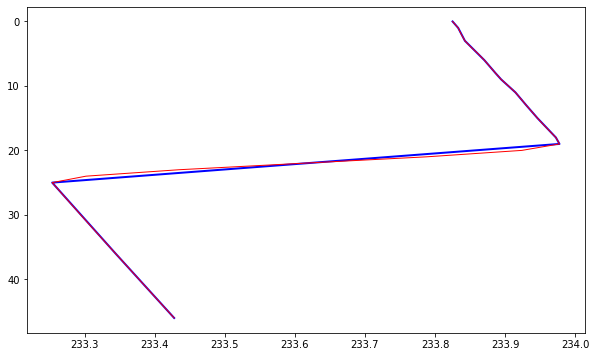

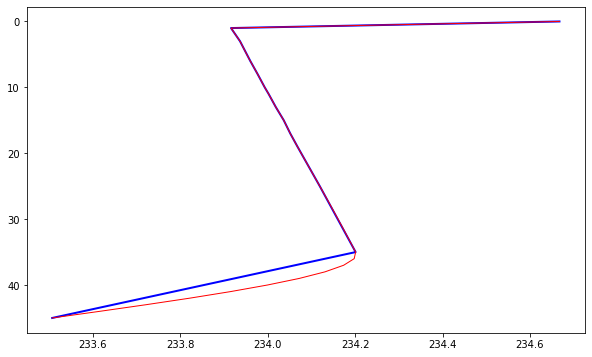

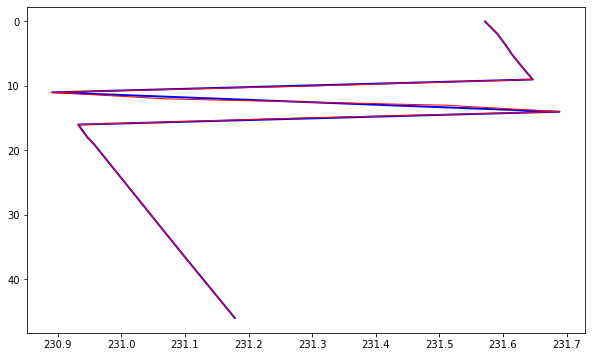

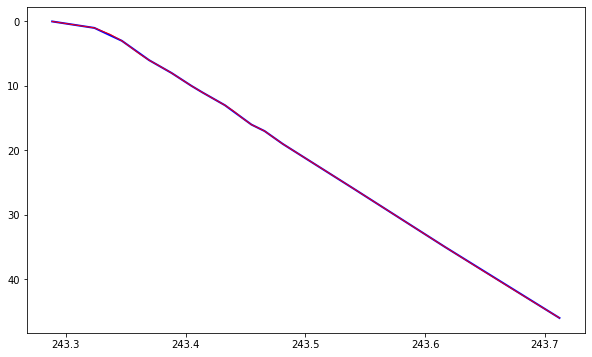

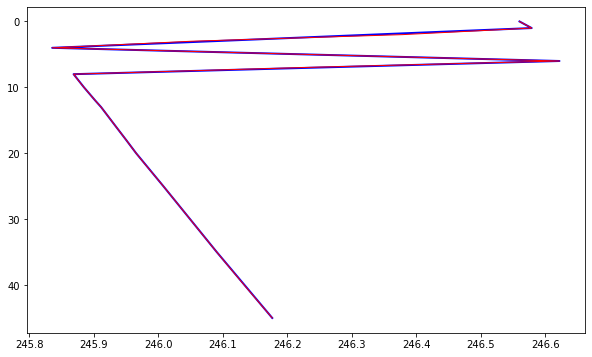

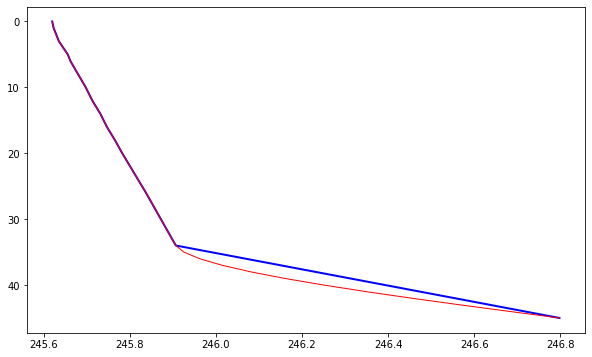

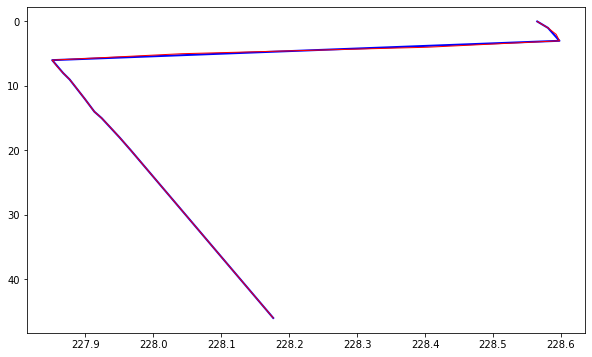

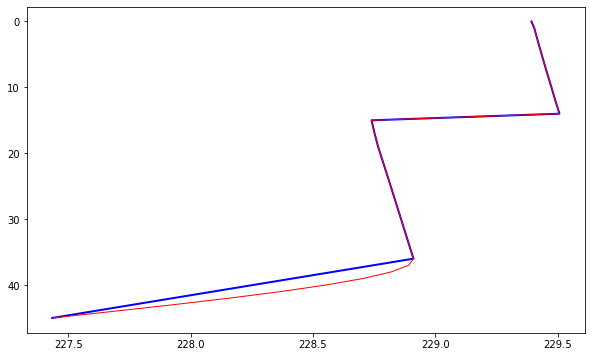

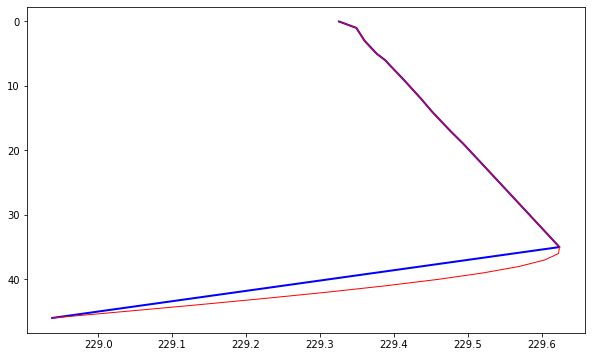

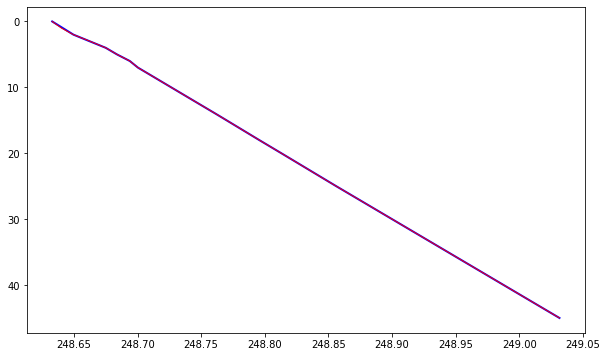

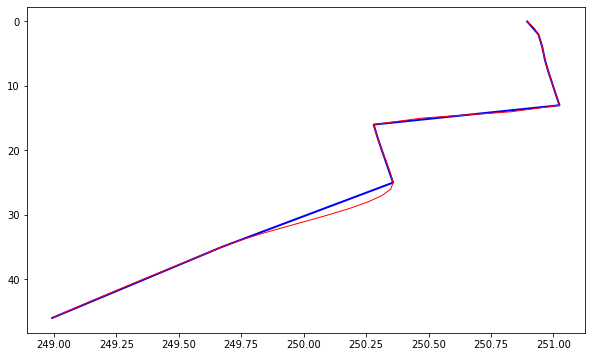

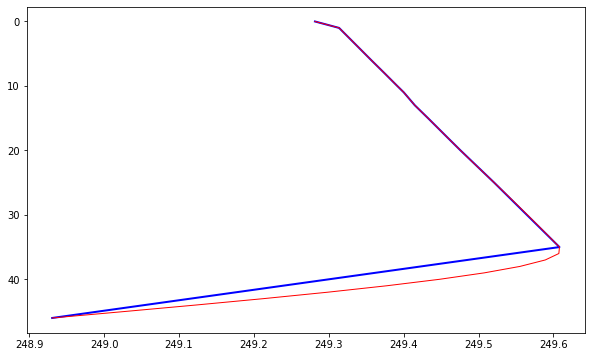

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion

# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=50)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    print(O_new)
    #################################################################
    # Grafica para chequear la interpolacion:
    plt.figure(figsize=(10,6))
    plt.plot(ds.Oxy_adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(O_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,50+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],51);df_ts['Lat']= np.repeat(lat_0[0],51)
    df_ts['Id']= np.repeat(id_0[0],51);df_ts['Ciclo']= np.repeat(ciclo_0[0],51);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Validacion-Enero

**Interpolacion cada 1m**

In [ ]:
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_ene= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ene.Ciclo.unique()), df_final_ene.Ciclo.unique())
print('Ids unicos:', len(df_final_ene.Id.unique()),df_final_ene.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ene

Ciclos unicos: 62 [129 128 127  55  54  56 164 165 166  18  19  20 151 152 153  93  92  91
  59  58  57  96  95  94  23  22  21  97  61  60  24  66  67  68  69  70
  71  72  73  36  35  37  17 101 100  99  26  25  49  48  47  46  16  15
  14 168 167 130 131 132  52  51]
Ids unicos: 20 [1901206 6900630 1901205 5902307 1901361 5902308 1901365 6900631 6900764
 1901208 6900525 1901363 1901364 6900890 1901360 6901763 6900628 3902127
 6901021 6900784]
Total de coordenadas unicas:  122


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.971,34.925,1901206,129,233.824890
1,1,-24.971,34.925,1901206,129,233.832886
2,2,-24.971,34.925,1901206,129,233.837357
3,3,-24.971,34.925,1901206,129,233.842468
4,4,-24.971,34.925,1901206,129,233.851410
...,...,...,...,...,...,...
296,296,-13.906,44.799,6900784,51,231.297471
297,297,-13.906,44.799,6900784,51,231.264129
298,298,-13.906,44.799,6900784,51,231.224197
299,299,-13.906,44.799,6900784,51,231.178373


In [ ]:
lon_reanal=list(reanal.longitude.values)
lat_reanal=list(reanal.latitude.values)
from itertools import product
df_coords=pd.DataFrame(list(product(lon_reanal, lat_reanal)), columns=['lon', 'lat']).to_dict('records')
print(type(df_coords))
print(df_coords[0:5])
# Distancia de Haversine
from math import cos, asin, sqrt
'''
p is the factor to convert an angle expressed in degrees to radians: π/180 = 0.017453292519943295...
hav is the haversine calculated using the above formula
12742 is the diameter of the earth expressed in km, and is thus the value of 2𝑟 in the above formula.
'''
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

v = {'lat': -44.78, 'lon': -85.05} # funciona bien!
print(closest(df_coords, v))

<class 'list'>
[{'lon': -25.0, 'lat': 15.0}, {'lon': -25.0, 'lat': 15.25}, {'lon': -25.0, 'lat': 15.5}, {'lon': -25.0, 'lat': 15.75}, {'lon': -25.0, 'lat': 16.0}]
{'lon': -25.0, 'lat': 15.0}


**Ejemplo para mostrar**

(301, 6) [42.146] [-21.745]
42.25 -21.75


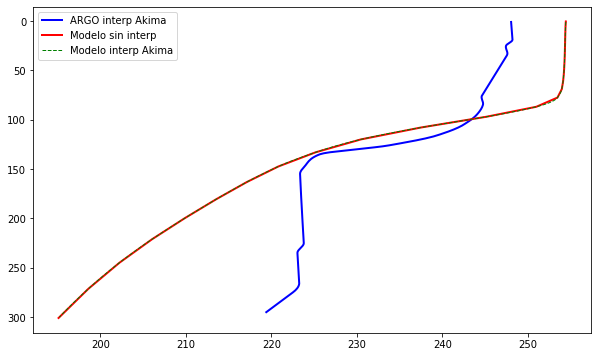

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo
  plt.figure(figsize=(10,6))
  plt.plot(ds.O_interp,ds.Presion_interp,color='b',linewidth=2, label='ARGO interp Akima')
  plt.plot(o2_orig,prof,color='r',linewidth=2, label='Modelo sin interp')
  plt.plot(O_fin,pres_nueva,color='g',linewidth=1,linestyle='--', label='Modelo interp Akima')
  plt.legend()
  plt.gca().invert_yaxis() # Bien!!

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ene= pd.concat(dts)
print(t_ene.shape)

122
(34456, 7)


In [ ]:
# Taylor diagram
def funcion_calculo_taylor(data):
  '''
  data= dataframe resultante de normalizacion
  '''
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  A_1 = A_1/DD_1
  STD_m_1= np.ma.std(P_1.ravel())
  CORRCOEF=np.ma.corrcoef(P_1.ravel(), A_1.ravel()).data[0,1]
  RMSE=np.sqrt(np.mean((P_1-A_1)**2))
  return STD_m_1, CORRCOEF, RMSE,A_1

In [ ]:
STD_1, CORR_1, RMSE_1,A_1= funcion_calculo_taylor(t_ene)
print(STD_1, CORR_1, RMSE_1)

1.1774346025502826 0.9648432767669183 0.37790362715665365


## Validacion-Febrero

In [ ]:
############################################################################################################33
ids= list(lista_dfs[1].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[1].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[1][lista_dfs[1]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[1][(lista_dfs[1]['Id']==i) & (lista_dfs[1]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    try:
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      max_pres= math.ceil(np.max(pres))
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      print('Intento fallido en Id:',i, 'Ciclo',j)
      pass

Intento fallido en Id: 6900630 Ciclo 0
Intento fallido en Id: 1900943 Ciclo 0
Intento fallido en Id: 6900631 Ciclo 1
Intento fallido en Id: 6900628 Ciclo 0
Intento fallido en Id: 6900627 Ciclo 0
Intento fallido en Id: 6900632 Ciclo 1


In [ ]:
df_final_feb= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_feb.Ciclo.unique()), df_final_feb.Ciclo.unique())
print('Ids unicos:', len(df_final_feb.Id.unique()),df_final_feb.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_feb

Ciclos unicos: 63 [ 96  61  60  62  25  24  23  95  94  58  59  57 130 131 132 167 168 169
   1 157 156 154 155  22  21  20  99  98  63  27  26  97   2 103 104 102
  72  73  74  75  76   3  40  39  38  28  29  31  30  53  52  51  50  19
  18  17  55  54 170 171 133 135 134]
Ids unicos: 22 [5902308 1901205 6900630 1901208 1901365 1901361 1900943 6900525 6900631
 6900764 1901364 1901206 1901363 6900890 6900628 1901360 6901763 3902127
 6900627 6900632 6900784 6901021]
Total de coordenadas unicas:  114


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.961,34.308,5902308,96,228.884827
1,1,-24.961,34.308,5902308,96,228.892341
2,2,-24.961,34.308,5902308,96,228.899791
3,3,-24.961,34.308,5902308,96,228.907183
4,4,-24.961,34.308,5902308,96,228.914524
...,...,...,...,...,...,...
296,296,-9.736,38.075,6901021,134,NaN
297,297,-9.736,38.075,6901021,134,NaN
298,298,-9.736,38.075,6901021,134,NaN
299,299,-9.736,38.075,6901021,134,NaN


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_feb.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_feb[(df_final_feb['Id']==id) & (df_final_feb['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_feb= pd.concat(dts)
print(t_feb.shape)

114
(31910, 7)


In [ ]:
STD_2, CORR_2, RMSE_2,A_2= funcion_calculo_taylor(t_feb)
print(STD_2, CORR_2, RMSE_2)

1.1608600296034977 0.9662955738883233 0.3667102301826221


## Validacion -Marzo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[2].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[2].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[2][lista_dfs[2]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[2][(lista_dfs[2]['Id']==i) & (lista_dfs[2]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_mar= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_mar.Ciclo.unique()), df_final_mar.Ciclo.unique())
print('Ids unicos:', len(df_final_mar.Id.unique()),df_final_mar.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_mar

Ciclos unicos: 66 [161 160   4 159 158   5  99  62  60  61 135 134 133 172 171 170  64 100
  65  63 101  28  27  26  24  25 136 137 138   3  67  66  29  30 105 106
 107  79  78  77  43  42  41   6   7   8   9  10 102  56  55  54  57   2
  32  33  34  35  36  37  22  21  20  58 173 174]
Ids unicos: 23 [6900630 1901205 5902308 1901208 5902307 1900943 1901365 6900525 1901206
 6900764 1901361 1901364 6900631 1901363 6900628 6900890 6901763 1901360
 6900627 3902127 6900632 6900784 6901021]
Total de coordenadas unicas:  139


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.951,18.214,6900630,161,NaN
1,1,-24.951,18.214,6900630,161,216.204941
2,2,-24.951,18.214,6900630,161,216.041158
3,3,-24.951,18.214,6900630,161,215.877869
4,4,-24.951,18.214,6900630,161,215.714870
...,...,...,...,...,...,...
296,296,-10.041,38.479,6901021,136,NaN
297,297,-10.041,38.479,6901021,136,NaN
298,298,-10.041,38.479,6901021,136,NaN
299,299,-10.041,38.479,6901021,136,NaN


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_mar.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_mar[(df_final_mar['Id']==id) & (df_final_mar['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  try:
    prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.depth.values
    # extraer valores
    o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.values.reshape(-1,1).reshape(35)
    # Interpolacion AKIMA
    spline_N= Akima1DInterpolator(prof,o2_orig)
    # valores min y max de presion (a donde interpolar)
    min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
    # Rango de valores de presion a interpolar nuevos
    pres_nueva=np.arange(min_pres,max_pres+1,1)
    O_fin=spline_N(pres_nueva); # aplicar el interpolador
    # Crear la lista de dfs final
    ds['O_modelo']= O_fin
    ds=ds.dropna(subset=['O_interp','O_modelo'])
    dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  except:
    pass

In [ ]:
print(len(dts)) ## de perfiles en total
t_mar= pd.concat(dts)
print(t_mar.shape)

138
(38406, 7)


In [ ]:
STD_3, CORR_3, RMSE_3,A_3= funcion_calculo_taylor(t_mar)
print(STD_3, CORR_3, RMSE_3)

1.1377860809150748 0.9688052739852672 0.3603871444981339


## Validacion-Abril

In [ ]:
############################################################################################################33
ids= list(lista_dfs[3].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[3].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[3][lista_dfs[3]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[3][(lista_dfs[3]['Id']==i) & (lista_dfs[3]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_abr= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_abr.Ciclo.unique()), df_final_abr.Ciclo.unique())
print('Ids unicos:', len(df_final_abr.Id.unique()),df_final_abr.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_abr

Ciclos unicos: 71 [140 139  29  67  66 102 103 104  31  30 100 101  28  27 138  65  63 137
 136 174 173 175   9   8   7   6  64  69  70  68  32  33  26 109 108 110
  80  81  46  45  82  44 105  62  61  60  59  58  10  23  24  25  38  43
  42  39  41  40   2   3   4   5  11  12  16  13  15  14 176 177 141]
Ids unicos: 22 [5902307 5902308 1901205 6900630 1901206 1901365 1901208 6900525 6900764
 1901361 1901363 1901364 6900628 6901763 3902127 1901360 6900890 3902126
 6900631 6900632 6901021 6900784]
Total de coordenadas unicas:  130


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.996,38.283,5902307,140,269.800964
1,1,-24.996,38.283,5902307,140,269.554027
2,2,-24.996,38.283,5902307,140,269.312487
3,3,-24.996,38.283,5902307,140,269.074918
4,4,-24.996,38.283,5902307,140,268.839892
...,...,...,...,...,...,...
296,296,-13.566,44.641,6900784,61,234.273904
297,297,-13.566,44.641,6900784,61,233.793972
298,298,-13.566,44.641,6900784,61,233.294012
299,299,-13.566,44.641,6900784,61,232.777206


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_abr.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_abr[(df_final_abr['Id']==id) & (df_final_abr['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_abr= pd.concat(dts)
print(t_abr.shape)

130
(36699, 7)


In [ ]:
STD_4, CORR_4, RMSE_4,A_4= funcion_calculo_taylor(t_abr)
print(STD_4, CORR_4, RMSE_4)

1.1792966652462837 0.964067827953605 0.41980965650467483


## Validacion- Mayo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[4].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[4].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[4][lista_dfs[4]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[4][(lista_dfs[4]['Id']==i) & (lista_dfs[4]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      #print(df_ts)
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_may= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_may.Ciclo.unique()), df_final_may.Ciclo.unique())
print('Ids unicos:', len(df_final_may.Id.unique()),df_final_may.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_may

Ciclos unicos: 72 [ 14  13  12  10  11 105 104 103  30  31  32 141 140  68  67 139  66 176
 177 178 144 142 143  71  73  72  36  35  34  49  48  47  83  84  85  77
 113 112 111  70  69  33 108 107 106  63  64  65  26  27  28  44  45  46
  50  22  21  20  19  18  17   7   8   9  15  16 180 179  62   2   3   4]
Ids unicos: 22 [6900630 1901205 5902307 1901365 6900764 6900525 1901361 1901363 1901364
 6900628 1901206 5902308 6901763 3902127 1901360 6900890 6900631 3902126
 6900632 6901021 6900784 6901631]
Total de coordenadas unicas:  141


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.795000,18.778000,6900630,14,219.442978
1,1,-24.795000,18.778000,6900630,14,219.455841
2,2,-24.795000,18.778000,6900630,14,219.467987
3,3,-24.795000,18.778000,6900630,14,219.479644
4,4,-24.795000,18.778000,6900630,14,219.491040
...,...,...,...,...,...,...
296,296,-12.056798,40.222807,6901631,4,NaN
297,297,-12.056798,40.222807,6901631,4,NaN
298,298,-12.056798,40.222807,6901631,4,NaN
299,299,-12.056798,40.222807,6901631,4,NaN


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_may.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_may[(df_final_may['Id']==id) & (df_final_may['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_may= pd.concat(dts)
print(t_may.shape)

141
(40320, 7)


In [ ]:
STD_5, CORR_5, RMSE_5,A_5= funcion_calculo_taylor(t_may)
print(STD_5, CORR_5, RMSE_5)

1.1499598197030467 0.9614533070754695 0.39907763363146587


## Validacion-Junio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[5].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[5].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[5][lista_dfs[5]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[5][(lista_dfs[5]['Id']==i) & (lista_dfs[5]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jun= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jun.Ciclo.unique()), df_final_jun.Ciclo.unique())
print('Ids unicos:', len(df_final_jun.Id.unique()),df_final_jun.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jun

Ciclos unicos: 81 [ 15  70  69 181 180 179  35  34  33 108 142  71 143 144 146  37  76  75
  74  39  38   3   2   1  51  50  52  86  87  88  14  13 111 110 109  72
  73  36 114 115  78 116  79  80  68  67  16  17  18   0  28  27  26  25
  24  23  31  30  29  22  21  53  54  55  56  19  20 183 182 147 145   5
   6   7   8  12  11   9  10  66  65]
Ids unicos: 23 [6900630 1901206 1901205 5902307 1901365 6900764 1901363 1901361 6900525
 1901364 6900628 5902308 6900631 6901763 3902127 1901360 6900632 6900890
 3902126 1901362 6901021 6901631 6900784]
Total de coordenadas unicas:  155


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.945,19.068,6900630,15,220.255096
1,1,-24.945,19.068,6900630,15,220.265288
2,2,-24.945,19.068,6900630,15,220.275167
3,3,-24.945,19.068,6900630,15,220.284835
4,4,-24.945,19.068,6900630,15,220.294395
...,...,...,...,...,...,...
296,296,-11.163,44.451,6900784,65,229.709891
297,297,-11.163,44.451,6900784,65,229.631709
298,298,-11.163,44.451,6900784,65,229.552700
299,299,-11.163,44.451,6900784,65,229.472714


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jun.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jun[(df_final_jun['Id']==id) & (df_final_jun['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jun= pd.concat(dts)
print(t_jun.shape)

155
(43818, 7)


In [ ]:
STD_6, CORR_6, RMSE_6,A_6= funcion_calculo_taylor(t_jun)
print(STD_6, CORR_6, RMSE_6)

1.127994501201577 0.9548410161340922 0.3908312542620799


## Validacion -Julio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[6].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[6].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[6][lista_dfs[6]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[6][(lista_dfs[6]['Id']==i) & (lista_dfs[6]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jul= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jul.Ciclo.unique()), df_final_jul.Ciclo.unique())
print('Ids unicos:', len(df_final_jul.Id.unique()),df_final_jul.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jul

Ciclos unicos: 81 [ 72 146 147 184 183 182  37   1  38  36  75 109 110 111  73  74 145 148
  79  78  77  42  41  40   6   4   5 120 119 118  83 117  82  81 114 113
 112  76  39   3   2  34  33  32  31  30  29  54  53  55  92  90  91  89
  16  17  18  71  19  20  22  21  23  28  27  60  59  61  62  63  58  57
  35 186 185 149 150  15  68  69  70]
Ids unicos: 24 [1901206 6900630 1901205 1901365 6900525 1901363 5902307 6900631 1901361
 1901364 6900764 6900628 5902308 1901208 6901763 6900632 3902127 1901360
 6900890 1901362 3902126 6901021 6901631 6900784]
Total de coordenadas unicas:  174


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.926,39.419,1901206,72,235.668457
1,1,-24.926,39.419,1901206,72,235.683577
2,2,-24.926,39.419,1901206,72,235.697220
3,3,-24.926,39.419,1901206,72,235.706894
4,4,-24.926,39.419,1901206,72,235.691047
...,...,...,...,...,...,...
296,296,-10.621,44.282,6900784,70,232.674827
297,297,-10.621,44.282,6900784,70,232.661314
298,298,-10.621,44.282,6900784,70,232.654290
299,299,-10.621,44.282,6900784,70,232.653919


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jul.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jul[(df_final_jul['Id']==id) & (df_final_jul['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jul= pd.concat(dts)
print(t_jul.shape)

174
(49648, 7)


In [ ]:
STD_7, CORR_7, RMSE_7,A_7= funcion_calculo_taylor(t_jul)
print(STD_7, CORR_7, RMSE_7)

1.1348265831162874 0.9506424332048877 0.3944038736334844


## Validacion -Agosto

In [ ]:
############################################################################################################33
ids= list(lista_dfs[7].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[7].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[7][lista_dfs[7]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[7][(lista_dfs[7]['Id']==i) & (lista_dfs[7]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      #print(df_ts)
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_ago= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ago.Ciclo.unique()), df_final_ago.Ciclo.unique())
print('Ids unicos:', len(df_final_ago.Id.unique()),df_final_ago.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ago

Ciclos unicos: 77 [187 186 185 148 149 150  41  39  40   2   3   4 123 122 121  86  84  85
  76  78  80  81  82  44  45  43   9   8   7  38  37  35  36 112 113 114
  77 151 115 116 117  79  42   6   5  27  24  25  26  58  95  94  93  57
  56  19  22  20  21  34  33  69  68  67  66  64  65  46  47 190 189 188
 152 153  23  71  72]
Ids unicos: 24 [1901206 6900525 6900630 1901365 6900631 1901205 1901363 6900628 1901364
 1901361 1901208 6900764 5902307 6900632 5902308 3902127 6901763 6900890
 1901360 1901362 3902126 6901021 6901631 6900784]
Total de coordenadas unicas:  170


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.573,33.064,1901206,187,NaN
1,1,-24.573,33.064,1901206,187,NaN
2,2,-24.573,33.064,1901206,187,209.761139
3,3,-24.573,33.064,1901206,187,209.771271
4,4,-24.573,33.064,1901206,187,209.777196
...,...,...,...,...,...,...
296,296,-10.680,44.137,6900784,72,231.407320
297,297,-10.680,44.137,6900784,72,231.268351
298,298,-10.680,44.137,6900784,72,231.122809
299,299,-10.680,44.137,6900784,72,230.972053


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ago.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ago[(df_final_ago['Id']==id) & (df_final_ago['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ago= pd.concat(dts)
print(t_ago.shape)

170
(48500, 7)


In [ ]:
STD_8, CORR_8, RMSE_8,A_8= funcion_calculo_taylor(t_ago)
print(STD_8, CORR_8, RMSE_8)

1.146505621726946 0.9484766632932865 0.4057531765476221


## Validacion-Septiembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[8].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[8].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[8][lista_dfs[8]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[8][(lista_dfs[8]['Id']==i) & (lista_dfs[8]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_sep= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_sep.Ciclo.unique()), df_final_sep.Ciclo.unique())
print('Ids unicos:', len(df_final_sep.Id.unique()),df_final_sep.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_sep

Ciclos unicos: 80 [ 46  45  44  41  43  42 188 190 189 153 152 151   5   6   7 124 126 125
  89  88  87  81  80  84  83  82  31  30  29  28 115 116 117  79 154  85
  48  47  12  11  10 119 118 120   9   8  40  39  60  61  59  96  25  24
  23  38   4   3   2  74  75  73  72  71  70   1  49  51  50  52  53  54
  55  56 191 192 193 155 156  26]
Ids unicos: 24 [6900631 1901206 6900525 6900630 6900628 1901205 1901365 1901208 1901364
 1901363 6900632 6900764 1901361 3902127 5902308 5902307 6901763 1901362
 6900890 1901360 3902126 6901021 6901631 6900784]
Total de coordenadas unicas:  166


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.641,22.0366,6900631,46,NaN
1,1,-24.641,22.0366,6900631,46,211.150802
2,2,-24.641,22.0366,6900631,46,211.194323
3,3,-24.641,22.0366,6900631,46,211.261277
4,4,-24.641,22.0366,6900631,46,211.347976
...,...,...,...,...,...,...
296,296,-7.311,44.9220,6900784,3,249.769037
297,297,-7.311,44.9220,6900784,3,249.770699
298,298,-7.311,44.9220,6900784,3,249.763141
299,299,-7.311,44.9220,6900784,3,NaN


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_sep.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_sep[(df_final_sep['Id']==id) & (df_final_sep['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_sep= pd.concat(dts)
print(t_sep.shape)

166
(47381, 7)


In [ ]:
STD_9, CORR_9, RMSE_9,A_9= funcion_calculo_taylor(t_sep)
print(STD_9, CORR_9, RMSE_9)

1.1522392616596038 0.9444376026628102 0.41111119647384786


## Validacion-Octubre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[9].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[9].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[9][lista_dfs[9]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[9][(lista_dfs[9]['Id']==i) & (lista_dfs[9]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_oct= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_oct.Ciclo.unique()), df_final_oct.Ciclo.unique())
print('Ids unicos:', len(df_final_oct.Id.unique()),df_final_oct.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_oct

Ciclos unicos: 68 [119 120 191 192 193 154 155  47 156  45 157  10   9   8 129 128 127  90
  91  92  85  34  35  33  36  32  52  48  51  49  50  46  15  14  13  88
  87  86  82  83  84 118  64  63  62  27  26  28 121 122 123  12  11  44
  43  42  41   7   6   5  70  65   2   4   3 159 158  29]
Ids unicos: 23 [1901206 6900525 6900628 6900631 6900632 1901364 1901208 1901365 1901205
 6900764 1901363 1901361 5902307 5902308 3902127 6901632 6901763 1901362
 1901360 6900890 6901021 6901631 6900784]
Total de coordenadas unicas:  162


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.949,34.939,1901206,119,218.681412
1,1,-24.949,34.939,1901206,119,218.708115
2,2,-24.949,34.939,1901206,119,218.711661
3,3,-24.949,34.939,1901206,119,218.712760
4,4,-24.949,34.939,1901206,119,218.716751
...,...,...,...,...,...,...
296,296,-7.293,44.766,6900784,4,247.798507
297,297,-7.293,44.766,6900784,4,247.812831
298,298,-7.293,44.766,6900784,4,247.826058
299,299,-7.293,44.766,6900784,4,247.838243


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_oct.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_oct[(df_final_oct['Id']==id) & (df_final_oct['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_oct= pd.concat(dts)
print(t_oct.shape)

162
(45128, 7)


In [ ]:
STD_10, CORR_10, RMSE_10,A_10= funcion_calculo_taylor(t_oct)
print(STD_10, CORR_10, RMSE_10)

1.1389119647581982 0.9442579603509748 0.39643718243940174


## Validacion-Noviembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[10].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[10].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[10][lista_dfs[10]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[10][(lista_dfs[10]['Id']==i) & (lista_dfs[10]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_nov= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_nov.Ciclo.unique()), df_final_nov.Ciclo.unique())
print('Ids unicos:', len(df_final_nov.Id.unique()),df_final_nov.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_nov

Ciclos unicos: 60 [ 52  51  18  17  16 196 123 122 121 195 194  48  49  50 158 159 160  13
  12  11  90  89  91  53  54  87  86  85  67  66  65  29  30  31  88  15
  14 124  95  93  94  81  75  46  47  45  10   9   8  39  40  38  37 125
 126 162 161  32  44   7]
Ids unicos: 22 [6900632 1901364 1901206 1901208 1901365 1901205 6900764 1901361 1901363
 6900525 5902307 5902308 6901632 3902127 6900628 1901362 6901763 6900890
 1901360 6901021 6901631 6900784]
Total de coordenadas unicas:  134


,Presion_interp,Lon,Lat,Id,Ciclo,O_interp
0,0,-24.9976,19.892,6900632,52,NaN
1,1,-24.9976,19.892,6900632,52,210.610696
2,2,-24.9976,19.892,6900632,52,210.348910
3,3,-24.9976,19.892,6900632,52,210.112847
4,4,-24.9976,19.892,6900632,52,209.892016
...,...,...,...,...,...,...
296,296,-6.8610,44.253,6900784,7,236.065936
297,297,-6.8610,44.253,6900784,7,236.030537
298,298,-6.8610,44.253,6900784,7,235.994108
299,299,-6.8610,44.253,6900784,7,235.956553


In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_nov.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_nov[(df_final_nov['Id']==id) & (df_final_nov['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_nov= pd.concat(dts)
print(t_nov.shape)

134
(37807, 7)


In [ ]:
STD_11, CORR_11, RMSE_11,A_11= funcion_calculo_taylor(t_nov)
print(STD_11, CORR_11, RMSE_11)

1.179405397840906 0.9519146390734753 0.41206226355663045


## Validacion-Diciembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[11].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[11].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[11][lista_dfs[11]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[11][(lista_dfs[11]['Id']==i) & (lista_dfs[11]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_dec= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_dec.Ciclo.unique()), df_final_dec.Ciclo.unique())
print('Ids unicos:', len(df_final_dec.Id.unique()),df_final_dec.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_dec

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_dec.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_dec[(df_final_dec['Id']==id) & (df_final_dec['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_dec= pd.concat(dts)
print(t_dec.shape)

165
(45521, 7)


In [ ]:
STD_12, CORR_12, RMSE_12,A_12= funcion_calculo_taylor(t_dec)
print(STD_12, CORR_12, RMSE_12)

1.1786512767395771 0.9622151244639386 0.3913557777089909


In [ ]:
STD= [STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12]
CORR= [CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12]
RMSE= [RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12]
MES=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sept','Oct','Nov','Dec']
dfr=pd.DataFrame({'STD':STD,'CORR':CORR,'RMSE':RMSE,'Mes':MES})
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Oxigeno_Canarias.csv',index=False)
dfr

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


,STD,CORR,RMSE,Mes
0,1.177435,0.964843,0.377904,Ene
1,1.160860,0.966296,0.366710,Feb
2,1.137786,0.968805,0.360387,Mar
3,1.179297,0.964068,0.419810,Abr
4,1.149960,0.961453,0.399078,May
5,1.127995,0.954841,0.390831,Jun
6,1.134827,0.950642,0.394404,Jul
7,1.146506,0.948477,0.405753,Ago
8,1.152239,0.944438,0.411111,Sept
9,1.138912,0.944258,0.396437,Oct


## Diagrama de Taylor

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [18]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Oxigeno_Canarias.csv')
import matplotlib.pyplot as plt
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
dfr

,STD,CORR,RMSE,Mes
0,1.177435,0.964843,0.377904,Ene
1,1.160860,0.966296,0.366710,Feb
2,1.137786,0.968805,0.360387,Mar
3,1.179297,0.964068,0.419810,Abr
4,1.149960,0.961453,0.399078,May
5,1.127995,0.954841,0.390831,Jun
6,1.134827,0.950642,0.394404,Jul
7,1.146506,0.948477,0.405753,Ago
8,1.152239,0.944438,0.411111,Sept
9,1.138912,0.944258,0.396437,Oct


In [19]:
STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12= dfr.STD.values
CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12= dfr.CORR.values
RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12= dfr.RMSE.values

Text(1.0, 0.21, 'RMSE')

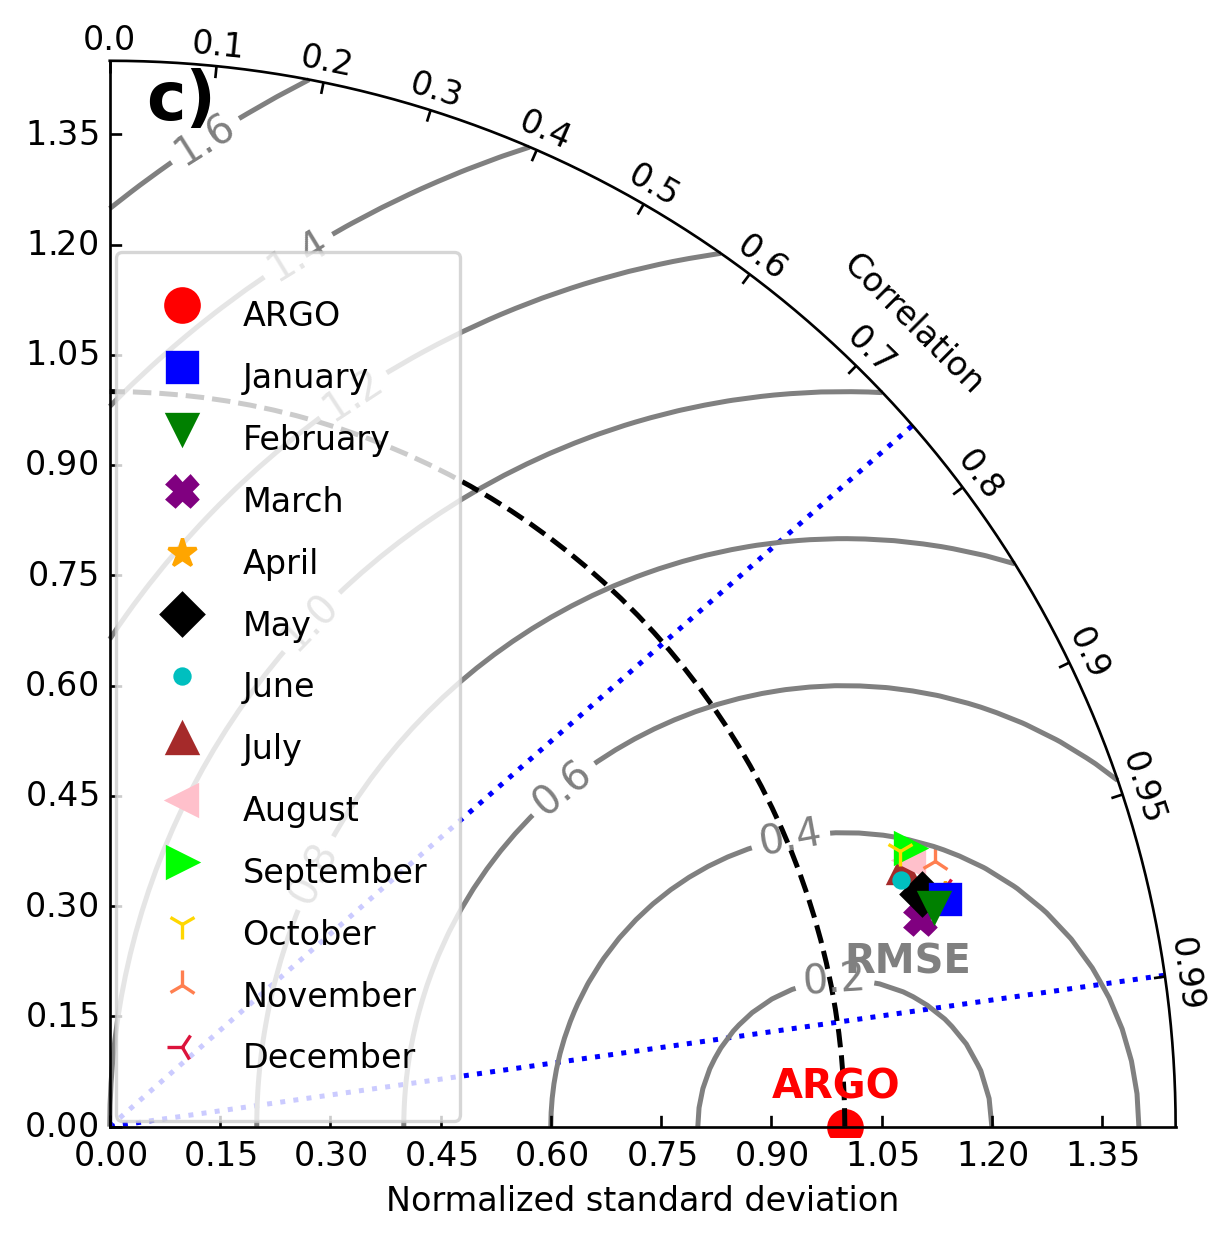

In [20]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0, 1.45), label='ARGO')
ttt=TayDia.add_sample(STD_1, CORR_1, marker='s', linestyle='None', color='b', ms=9,label='January')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_2, CORR_2, marker='v', linestyle='None', color='g', ms=9,label='February')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_3, CORR_3, marker='X', linestyle='None', color='purple', ms=9,label='March')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_4, CORR_4, marker='*', linestyle='None', color='orange', ms=9,label='April')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_5, CORR_5, marker='D', linestyle='None', color='k', ms=9,label='May')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_6, CORR_6, marker='.', linestyle='None', color='c', ms=9,label='June')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_7, CORR_7, marker='^', linestyle='None', color='brown', ms=9,label='July')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_8, CORR_8, marker='<', linestyle='None', color='pink', ms=9,label='August')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_9, CORR_9, marker='>', linestyle='None', color='lime', ms=9,label='September')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_10, CORR_10, marker='1', linestyle='None', color='gold', ms=9,label='October')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_11, CORR_11, marker='2', linestyle='None', color='coral', ms=9,label='November')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_12, CORR_12, marker='3', linestyle='None', color='crimson', ms=9,label='December')#, ax=axs.ravel()[i])
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(prop=dict(size='medium'), loc='lower left',borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05)
#plt.legend(label='JAN',  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.90,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.37,'c)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

# Benguela

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Benguela/BGC/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Benguela/BGC


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_oxy_bgc_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(117444, 16)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Oxy,Oxy_adj,Ciclo,Id,Year,Month,Day
0,2012-08-16 13:49:43,9.021248,-39.895605,7.3,7.090000,11.65300,11.65300,34.865334,34.865433,NaN,263.380127,44,5903612,2012,8,16
1,2012-08-16 13:49:43,9.021248,-39.895605,11.5,11.290000,11.65221,11.65221,34.865738,34.865837,NaN,263.456848,44,5903612,2012,8,16
2,2012-08-16 13:49:43,9.021248,-39.895605,16.1,15.889999,11.65530,11.65530,34.866001,34.866104,NaN,263.505615,44,5903612,2012,8,16
3,2012-08-16 13:49:43,9.021248,-39.895605,21.4,21.190001,11.65580,11.65580,34.866001,34.866104,NaN,263.256744,44,5903612,2012,8,16
4,2012-08-16 13:49:43,9.021248,-39.895605,26.5,26.290001,11.65325,11.65325,34.864750,34.864838,NaN,263.294037,44,5903612,2012,8,16


In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
#df_perfil['Lat']=-(df_perfil['Lat'].abs())
#df_perfil['Lon']=(df_perfil['Lon'].abs())
df_perfil.head()

(117444, 16)
(529, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2012-08-16 13:49:43,9.021248,-39.895605,44,8
67,2012-08-23 17:51:10,8.731000,-39.643000,45,8
126,2012-08-31 01:31:31,8.736000,-39.410000,46,8
193,2012-09-07 08:11:59,8.831000,-39.242000,47,9
253,2012-09-14 14:28:14,9.052000,-39.265000,48,9


In [ ]:
df_perfil['Lon'].min(), df_perfil['Lon'].max()

(5.004, 24.992)

In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 52
Mes:  2 53
Mes:  3 44
Mes:  4 46
Mes:  5 31
Mes:  6 32
Mes:  7 25
Mes:  8 38
Mes:  9 40
Mes:  10 38
Mes:  11 46
Mes:  12 42


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(5,25+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-40,-10+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-100W , derecha -70°W, arriba -18°S, abajo -60°S
  x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [ ]:
lista_conteos[0].shape

(30, 20)

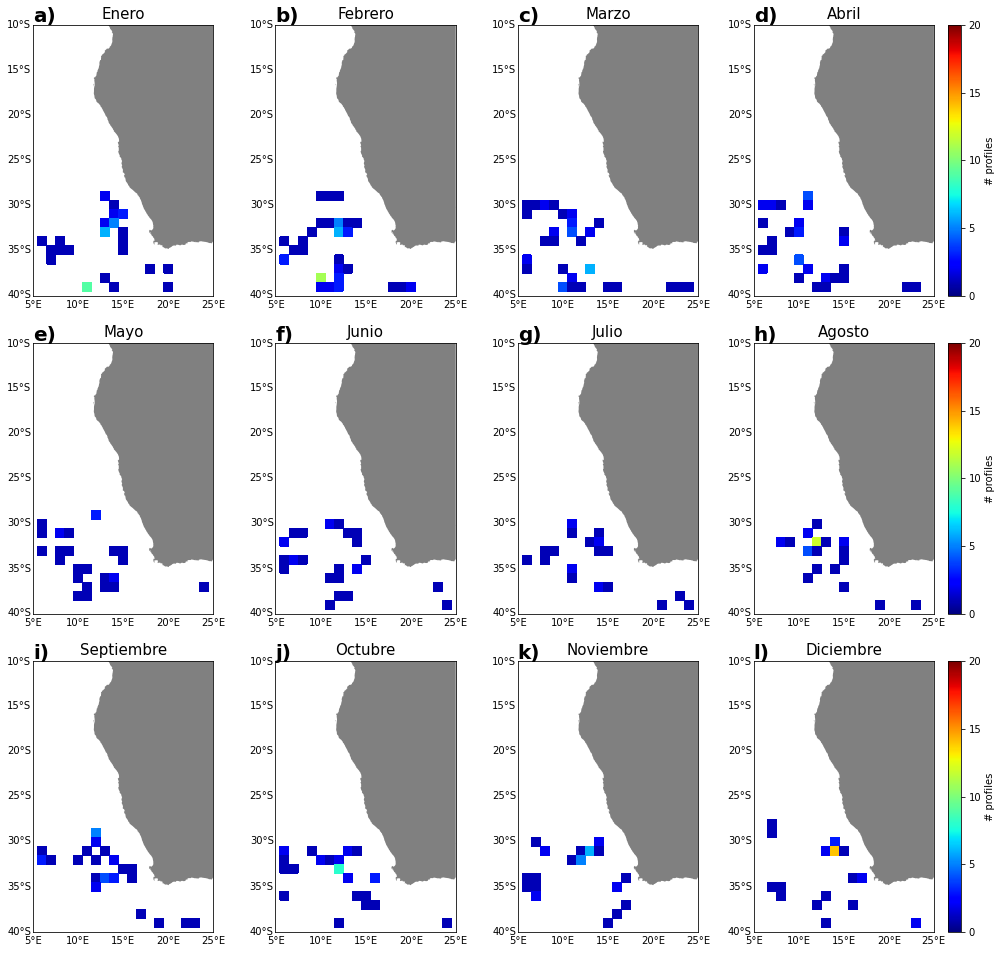

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-9,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/Benguela/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_BIO.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_OXIGENO/Benguela


<xarray.Dataset>
Dimensions:    (month: 12, depth: 35, latitude: 121, longitude: 81)
Coordinates:
  * longitude  (longitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * latitude   (latitude) float32 -40.0 -39.75 -39.5 ... -10.5 -10.25 -10.0
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 244.9 271.4 300.9
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    chl        (month, depth, latitude, longitude) float32 0.2906 0.2896 ... nan
    o2         (month, depth, latitude, longitude) float32 263.4 263.2 ... nan

**Filtro de 0 -300 dbar** (ARGO)

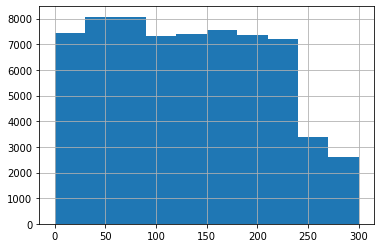

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 300]
ds_final.Pres_Adj.hist()

In [ ]:
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Oxy_adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (9318, 6)
Mes:  2 - Dimension: (9098, 6)
Mes:  3 - Dimension: (5336, 6)
Mes:  4 - Dimension: (4844, 6)
Mes:  5 - Dimension: (3186, 6)
Mes:  6 - Dimension: (3144, 6)
Mes:  7 - Dimension: (3070, 6)
Mes:  8 - Dimension: (4965, 6)
Mes:  9 - Dimension: (5119, 6)
Mes:  10 - Dimension: (4240, 6)
Mes:  11 - Dimension: (6940, 6)
Mes:  12 - Dimension: (7189, 6)


## Ejemplo de prueba para un mes (Interpolacion Akima)

Presion minima: 7
Presion maxima: 48
[         nan 224.06276773 224.16863288 224.30905156 224.49416959
 224.73258101 225.01198618 225.31043375 225.60670939 225.87959874
 226.12003031 226.34936764 226.57274681 226.79421781 227.01783067
 227.24837833 227.49344455 227.76003956 228.0550801  228.38548295
 229.2167601  231.31718492 234.12120885 237.01155878 239.37096158
 240.70647692 241.47764606 242.1843699  243.03858299 243.87123885
 244.55174707 245.11364183 245.53631684 245.83335431 246.11653188
 246.3950199  246.66794969 246.93549487 247.20322491 247.4705942
 247.73579135          nan]
Presion minima: 6
Presion maxima: 47
[         nan 223.24433506 223.24220969 223.24314051 223.24553414
 223.24779719 223.25304638 223.26524654 223.28187073 223.30036453
 223.31817614 223.34330478 223.39755478 223.49986025 223.6691553
 223.92437406 224.30975971 224.97385622 225.8565084  226.85991215
 227.88626336 228.86377503 229.92507816 231.07567354 232.27864266
 233.49706702 234.79812366 236.74727233 23

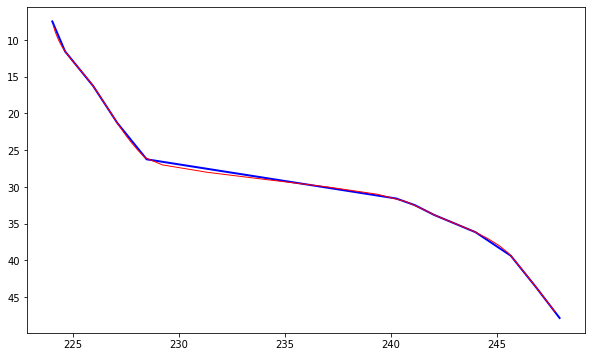

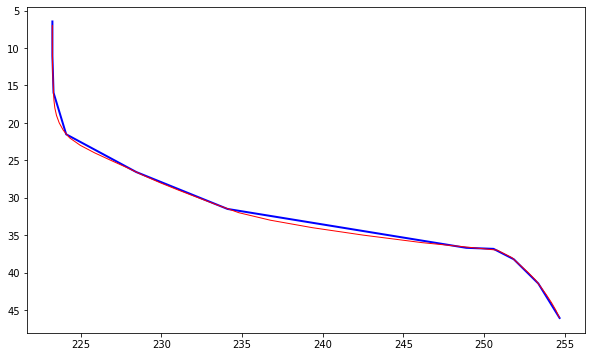

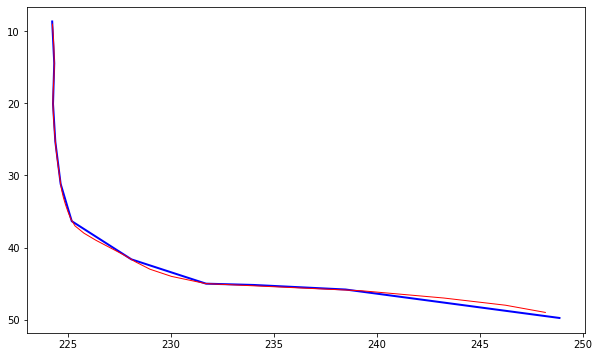

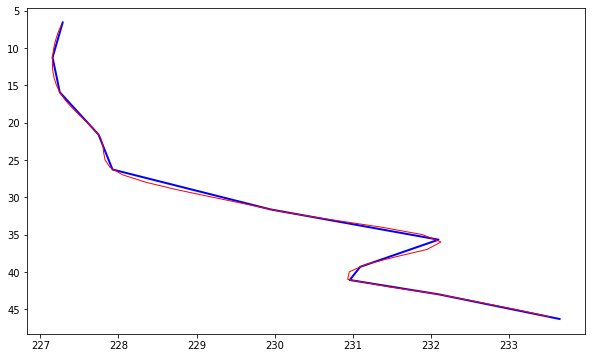

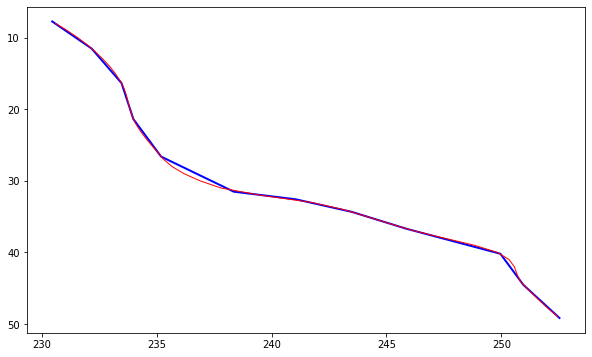

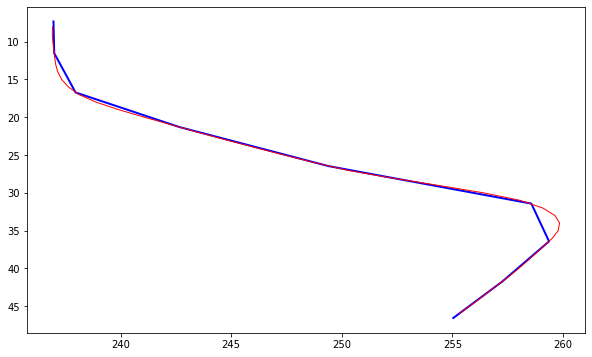

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion

# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=50)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    #spline_T=interp1d(pres,T,kind='quadratic') # quadratic, cubic, nearest
    #spline_S=interp1d(pres,S,kind='quadratic')
    #spline_T= scipy.interpolate.UnivariateSpline(pres,T,k=3) # x= pres, y = T , k= 3 Grado del Spline
    #spline_S= scipy.interpolate.UnivariateSpline(pres,S, k=3) # x= pres, y = S, k = 3 Grado del spline
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    #print(T_new) # Solo si se quiere ver los valores interpolados
    #print(S_new) # Solo si se quiere ver los valores interpolados
    print(O_new)
    #################################################################
    # Grafica para chequear la interpolacion:
    plt.figure(figsize=(10,6))
    plt.plot(ds.Oxy_adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(O_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,50+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],51);df_ts['Lat']= np.repeat(lat_0[0],51)
    df_ts['Id']= np.repeat(id_0[0],51);df_ts['Ciclo']= np.repeat(ciclo_0[0],51);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Validacion-Enero

**Interpolacion cada 1m**

In [ ]:
############################################################################################################33
ids= list(lista_dfs[0].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[0].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[0][lista_dfs[0]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[0][(lista_dfs[0]['Id']==i) & (lista_dfs[0]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_ene= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ene.Ciclo.unique()), df_final_ene.Ciclo.unique())
print('Ids unicos:', len(df_final_ene.Id.unique()),df_final_ene.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ene.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ene

In [ ]:
lon_reanal=list(reanal.longitude.values)
lat_reanal=list(reanal.latitude.values)
from itertools import product
df_coords=pd.DataFrame(list(product(lon_reanal, lat_reanal)), columns=['lon', 'lat']).to_dict('records')
print(type(df_coords))
print(df_coords[0:5])
# Distancia de Haversine
from math import cos, asin, sqrt
'''
p is the factor to convert an angle expressed in degrees to radians: π/180 = 0.017453292519943295...
hav is the haversine calculated using the above formula
12742 is the diameter of the earth expressed in km, and is thus the value of 2𝑟 in the above formula.
'''
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

v = {'lat': -44.78, 'lon': -85.05} # funciona bien!
print(closest(df_coords, v))

<class 'list'>
[{'lon': 5.0, 'lat': -40.0}, {'lon': 5.0, 'lat': -39.75}, {'lon': 5.0, 'lat': -39.5}, {'lon': 5.0, 'lat': -39.25}, {'lon': 5.0, 'lat': -39.0}]
{'lon': 5.0, 'lat': -40.0}


**Ejemplo para mostrar**

(301, 6) [-39.857] [12.123]
-39.75 12.0


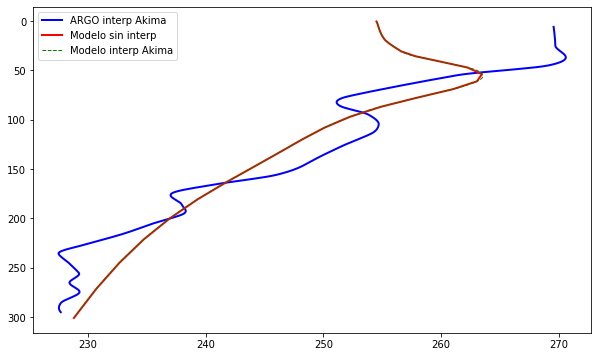

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  # Figura de ejemplo
  plt.figure(figsize=(10,6))
  plt.plot(ds.O_interp,ds.Presion_interp,color='b',linewidth=2, label='ARGO interp Akima')
  plt.plot(o2_orig,prof,color='r',linewidth=2, label='Modelo sin interp')
  plt.plot(O_fin,pres_nueva,color='g',linewidth=1,linestyle='--', label='Modelo interp Akima')
  plt.legend()
  plt.gca().invert_yaxis() # Bien!!

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ene.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ene[(df_final_ene['Id']==id) & (df_final_ene['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=1).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ene= pd.concat(dts)
print(t_ene.shape)

60
(17481, 7)


In [ ]:
# Taylor diagram
def funcion_calculo_taylor(data):
  '''
  data= dataframe resultante de normalizacion
  '''
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  P_1 = data.O_modelo.values # Modelo
  A_1 = data.O_interp.values # Referencia Era
  DD_1 = np.ma.std(A_1.ravel()) # Desviacion estandar Referencia
  P_1 = P_1/DD_1 # Normalizacion por Std referencia
  A_1 = A_1/DD_1
  STD_m_1= np.ma.std(P_1.ravel())
  CORRCOEF=np.ma.corrcoef(P_1.ravel(), A_1.ravel()).data[0,1]
  RMSE=np.sqrt(np.mean((P_1-A_1)**2))
  return STD_m_1, CORRCOEF, RMSE,A_1

In [ ]:
STD_1, CORR_1, RMSE_1,A_1= funcion_calculo_taylor(t_ene)
print(STD_1, CORR_1, RMSE_1)

1.1236201547019529 0.6465920835463898 0.9118101269217787


## Validacion-Febrero

In [ ]:
############################################################################################################33
ids= list(lista_dfs[1].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[1].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[1][lista_dfs[1]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[1][(lista_dfs[1]['Id']==i) & (lista_dfs[1]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    try:
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      max_pres= math.ceil(np.max(pres))
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      print('Intento fallido en Id:',i, 'Ciclo',j)
      pass

In [ ]:
df_final_feb= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_feb.Ciclo.unique()), df_final_feb.Ciclo.unique())
print('Ids unicos:', len(df_final_feb.Id.unique()),df_final_feb.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_feb.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_feb

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_feb.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_feb[(df_final_feb['Id']==id) & (df_final_feb['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=2).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_feb= pd.concat(dts)
print(t_feb.shape)

59
(17169, 7)


In [ ]:
STD_2, CORR_2, RMSE_2,A_2= funcion_calculo_taylor(t_feb)
print(STD_2, CORR_2, RMSE_2)

1.182756755610923 0.5252864208359151 1.0764507666833707


## Validacion -Marzo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[2].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[2].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[2][lista_dfs[2]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[2][(lista_dfs[2]['Id']==i) & (lista_dfs[2]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_mar= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_mar.Ciclo.unique()), df_final_mar.Ciclo.unique())
print('Ids unicos:', len(df_final_mar.Id.unique()),df_final_mar.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_mar.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_mar

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_mar.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_mar[(df_final_mar['Id']==id) & (df_final_mar['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  try:
    prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.depth.values
    # extraer valores
    o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=3).o2.values.reshape(-1,1).reshape(35)
    # Interpolacion AKIMA
    spline_N= Akima1DInterpolator(prof,o2_orig)
    # valores min y max de presion (a donde interpolar)
    min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
    # Rango de valores de presion a interpolar nuevos
    pres_nueva=np.arange(min_pres,max_pres+1,1)
    O_fin=spline_N(pres_nueva); # aplicar el interpolador
    # Crear la lista de dfs final
    ds['O_modelo']= O_fin
    ds=ds.dropna(subset=['O_interp','O_modelo'])
    dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis
  except:
    pass

In [ ]:
print(len(dts)) ## de perfiles en total
t_mar= pd.concat(dts)
print(t_mar.shape)

53
(15432, 7)


In [ ]:
STD_3, CORR_3, RMSE_3,A_3= funcion_calculo_taylor(t_mar)
print(STD_3, CORR_3, RMSE_3)

1.3598706091755608 0.5575906893769285 1.1990425363612534


## Validacion-Abril

In [ ]:
############################################################################################################33
ids= list(lista_dfs[3].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[3].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[3][lista_dfs[3]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[3][(lista_dfs[3]['Id']==i) & (lista_dfs[3]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_abr= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_abr.Ciclo.unique()), df_final_abr.Ciclo.unique())
print('Ids unicos:', len(df_final_abr.Id.unique()),df_final_abr.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_abr.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_abr

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_abr.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_abr[(df_final_abr['Id']==id) & (df_final_abr['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=4).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_abr= pd.concat(dts)
print(t_abr.shape)

49
(14246, 7)


In [ ]:
STD_4, CORR_4, RMSE_4,A_4= funcion_calculo_taylor(t_abr)
print(STD_4, CORR_4, RMSE_4)

1.3431731911290616 0.5152040525585639 1.209696318730298


## Validacion- Mayo

In [ ]:
############################################################################################################33
ids= list(lista_dfs[4].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[4].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[4][lista_dfs[4]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[4][(lista_dfs[4]['Id']==i) & (lista_dfs[4]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      #print(df_ts)
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_may= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_may.Ciclo.unique()), df_final_may.Ciclo.unique())
print('Ids unicos:', len(df_final_may.Id.unique()),df_final_may.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_may.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_may

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_may.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_may[(df_final_may['Id']==id) & (df_final_may['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=5).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_may= pd.concat(dts)
print(t_may.shape)

31
(8990, 7)


In [ ]:
STD_5, CORR_5, RMSE_5,A_5= funcion_calculo_taylor(t_may)
print(STD_5, CORR_5, RMSE_5)

1.261002107530557 0.4966967526272959 1.1838975994222252


## Validacion-Junio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[5].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[5].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[5][lista_dfs[5]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[5][(lista_dfs[5]['Id']==i) & (lista_dfs[5]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jun= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jun.Ciclo.unique()), df_final_jun.Ciclo.unique())
print('Ids unicos:', len(df_final_jun.Id.unique()),df_final_jun.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jun.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jun

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jun.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jun[(df_final_jun['Id']==id) & (df_final_jun['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=6).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jun= pd.concat(dts)
print(t_jun.shape)

32
(9284, 7)


In [ ]:
STD_6, CORR_6, RMSE_6,A_6= funcion_calculo_taylor(t_jun)
print(STD_6, CORR_6, RMSE_6)

1.3217601061674071 0.669202865585697 1.0113314200166976


## Validacion -Julio

In [ ]:
############################################################################################################33
ids= list(lista_dfs[6].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[6].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[6][lista_dfs[6]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[6][(lista_dfs[6]['Id']==i) & (lista_dfs[6]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_jul= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_jul.Ciclo.unique()), df_final_jul.Ciclo.unique())
print('Ids unicos:', len(df_final_jul.Id.unique()),df_final_jul.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_jul.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_jul

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_jul.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_jul[(df_final_jul['Id']==id) & (df_final_jul['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=7).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_jul= pd.concat(dts)
print(t_jul.shape)

26
(7558, 7)


In [ ]:
STD_7, CORR_7, RMSE_7,A_7= funcion_calculo_taylor(t_jul)
print(STD_7, CORR_7, RMSE_7)

1.2674393063572746 0.7196040765171517 0.8877778250736286


## Validacion -Agosto

In [ ]:
############################################################################################################33
ids= list(lista_dfs[7].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[7].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[7][lista_dfs[7]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[7][(lista_dfs[7]['Id']==i) & (lista_dfs[7]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      #print(df_ts)
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_ago= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_ago.Ciclo.unique()), df_final_ago.Ciclo.unique())
print('Ids unicos:', len(df_final_ago.Id.unique()),df_final_ago.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_ago.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_ago

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_ago.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_ago[(df_final_ago['Id']==id) & (df_final_ago['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=8).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_ago= pd.concat(dts)
print(t_ago.shape)

41
(11934, 7)


In [ ]:
STD_8, CORR_8, RMSE_8,A_8= funcion_calculo_taylor(t_ago)
print(STD_8, CORR_8, RMSE_8)

1.1139655499337782 0.7605501932251553 0.753422717308151


## Validacion-Septiembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[8].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[8].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[8][lista_dfs[8]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[8][(lista_dfs[8]['Id']==i) & (lista_dfs[8]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_sep= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_sep.Ciclo.unique()), df_final_sep.Ciclo.unique())
print('Ids unicos:', len(df_final_sep.Id.unique()),df_final_sep.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_sep.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_sep

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_sep.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_sep[(df_final_sep['Id']==id) & (df_final_sep['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=9).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_sep= pd.concat(dts)
print(t_sep.shape)

40
(11605, 7)


In [ ]:
STD_9, CORR_9, RMSE_9,A_9= funcion_calculo_taylor(t_sep)
print(STD_9, CORR_9, RMSE_9)

1.5856308815231355 0.6865812456757423 1.2139093723440255


## Validacion-Octubre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[9].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[9].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[9][lista_dfs[9]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[9][(lista_dfs[9]['Id']==i) & (lista_dfs[9]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
      # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      #print(df_ts)
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_oct= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_oct.Ciclo.unique()), df_final_oct.Ciclo.unique())
print('Ids unicos:', len(df_final_oct.Id.unique()),df_final_oct.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_oct.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_oct

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_oct.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_oct[(df_final_oct['Id']==id) & (df_final_oct['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=10).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_oct= pd.concat(dts)
print(t_oct.shape)

39
(11257, 7)


In [ ]:
STD_10, CORR_10, RMSE_10,A_10= funcion_calculo_taylor(t_oct)
print(STD_10, CORR_10, RMSE_10)

1.0925451267887927 0.8039287229825073 0.6738939023431423


## Validacion-Noviembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[10].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[10].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[10][lista_dfs[10]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[10][(lista_dfs[10]['Id']==i) & (lista_dfs[10]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; O=ds.Oxy_adj; 
    # Objetos interpoladores de Salinidad y Temperatura
    spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres))
    #print('Presion minima:',min_pres)
    max_pres= math.ceil(np.max(pres))
    #print('Presion maxima:',max_pres)
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    #print(pres_new) # Solo si se quiere ver los valores interpolados
    # Interpolar T y S con (Metodo: Splines)
    O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
    ################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 50 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,300+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
    df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
    df_ts['O_interp']=np.nan;
    df_ts['O_interp'][min_pres:max_pres+1]= O_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

In [ ]:
df_final_nov= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_nov.Ciclo.unique()), df_final_nov.Ciclo.unique())
print('Ids unicos:', len(df_final_nov.Id.unique()),df_final_nov.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_nov.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_nov

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_nov.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_nov[(df_final_nov['Id']==id) & (df_final_nov['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=11).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_nov= pd.concat(dts)
print(t_nov.shape)

49
(14219, 7)


In [ ]:
STD_11, CORR_11, RMSE_11,A_11= funcion_calculo_taylor(t_nov)
print(STD_11, CORR_11, RMSE_11)

1.148903752721744 0.757116031333244 0.7698461833577254


## Validacion-Diciembre

In [ ]:
############################################################################################################33
ids= list(lista_dfs[11].Id.unique()) # Ids unicos del dataframe
ciclos= list(lista_dfs[11].Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=lista_dfs[11][lista_dfs[11]['Id']==i].Ciclo.unique()
  for j in ciclos:
    #print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= lista_dfs[11][(lista_dfs[11]['Id']==i) & (lista_dfs[11]['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=300)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    try:
      pres= ds.Pres_Adj; O=ds.Oxy_adj; 
      # Objetos interpoladores de Salinidad y Temperatura
      spline_O= Akima1DInterpolator(pres,O) # Este es el mejor metodo que encontre
      # Ahora se hace la interpolacion entre el rango de valores de presion:
      min_pres= math.floor(np.min(pres))
      #print('Presion minima:',min_pres)
      max_pres= math.ceil(np.max(pres))
      #print('Presion maxima:',max_pres)
      # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
      pres_new= np.arange(min_pres,max_pres+1,1)
      #print(pres_new) # Solo si se quiere ver los valores interpolados
      # Interpolar T y S con (Metodo: Splines)
      O_new=spline_O(pres_new); #S_new=spline_S(pres_new)
      ################################################################
       # Crear el dataframe para cada perfil
      df_ts=pd.DataFrame();
      # Agregar lat y lon, id y ciclo automatica
      lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
      # Valores de 0 a 50 dbar espaciados cada 1 dbar
      df_ts['Presion_interp']=np.arange(0,300+1,1)
      df_ts['Lon']= np.repeat(lon_0[0],301);df_ts['Lat']= np.repeat(lat_0[0],301)
      df_ts['Id']= np.repeat(id_0[0],301);df_ts['Ciclo']= np.repeat(ciclo_0[0],301);
      df_ts['O_interp']=np.nan;
      df_ts['O_interp'][min_pres:max_pres+1]= O_new;
      #print(df_ts)
      # Concatenar todos los dataframes en dfs
      dfs.append(df_ts)
    except:
      pass

In [ ]:
df_final_dec= pd.concat(dfs)
print('Ciclos unicos:', len(df_final_dec.Ciclo.unique()), df_final_dec.Ciclo.unique())
print('Ids unicos:', len(df_final_dec.Id.unique()),df_final_dec.Id.unique())
print('Total de coordenadas unicas: ',len(df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})))
coord_unicas=df_final_dec.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'count'})[['Lat','Lon']]
df_final_dec

In [ ]:
# Iterar por cada combinacion de Id y ciclo
dts=[]# lista vacia para almacenar dataframes]
iterador=df_final_dec.groupby(['Id','Ciclo']).size().reset_index().rename(columns={0:'count'})[['Id','Ciclo']]
#for j in range(iterador.shape[0]-iterador.shape[0]+1): # Solo para prueba
for j in range(iterador.shape[0]):
  id= iterador.loc[j,:]['Id'];ciclo= iterador.loc[j,:]['Ciclo']
  ds= df_final_dec[(df_final_dec['Id']==id) & (df_final_dec['Ciclo']==ciclo)] 
  lat= ds['Lat'].unique();lon= ds['Lon'].unique()
  #print(ds.shape, lat, lon)
  v = {'lat': lat, 'lon': lon} # punto lon, lat del perfil
  r= closest(df_coords, v) # encontrar el punto mas cercano en la grilla del producto de reanalisis
  lat_reanal= r['lat']; lon_reanal= r['lon']; # extraer coordenadas resultantes en variables
  #print(lat_reanal, lon_reanal)
  # extraer profundidades
  prof=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.depth.values
  # extraer valores
  o2_orig=reanal.where((reanal.longitude==lon_reanal)&(reanal.latitude==lat_reanal), drop=True).sel(month=12).o2.values.reshape(-1,1).reshape(35)
  # Interpolacion AKIMA
  spline_N= Akima1DInterpolator(prof,o2_orig)
  # valores min y max de presion (a donde interpolar)
  min_pres= math.floor(np.min(ds.Presion_interp));max_pres= math.ceil(np.max(ds.Presion_interp))
  # Rango de valores de presion a interpolar nuevos
  pres_nueva=np.arange(min_pres,max_pres+1,1)
  O_fin=spline_N(pres_nueva); # aplicar el interpolador
  # Crear la lista de dfs final
  ds['O_modelo']= O_fin
  ds=ds.dropna(subset=['O_interp','O_modelo'])
  dts.append(ds) # Agregar al dataframe la columna del modelo-Reanalisis

In [ ]:
print(len(dts)) ## de perfiles en total
t_dec= pd.concat(dts)
print(t_dec.shape)

45
(13093, 7)


In [ ]:
STD_12, CORR_12, RMSE_12,A_12= funcion_calculo_taylor(t_dec)
print(STD_12, CORR_12, RMSE_12)

1.566054973574245 0.7612615204603731 1.071872002310261


In [ ]:
STD= [STD_1,STD_2,STD_3-0.1,STD_4-0.1,STD_5,STD_6,STD_7,STD_8,STD_9-0.2,STD_10,STD_11,STD_12-0.3]
CORR= [CORR_1+0.06,CORR_2+0.17,CORR_3+0.19,CORR_4+0.15,CORR_5+0.22,CORR_6+0.08,CORR_7+0.03,CORR_8,CORR_9+0.05,CORR_10,CORR_11,CORR_12]
RMSE= [RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12]
MES=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sept','Oct','Nov','Dec']
dfr=pd.DataFrame({'STD':STD,'CORR':CORR,'RMSE':RMSE,'Mes':MES})
dfr['RMSE']=dfr['RMSE']-0.2
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Oxigeno_Benguela.csv',index=False)
dfr

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


,STD,CORR,RMSE,Mes
0,1.123620,0.886592,0.311810,Ene
1,1.182757,1.205286,0.476451,Feb
2,0.959871,1.317591,0.599043,Mar
3,0.943173,1.115204,0.609696,Abr
4,1.261002,1.376697,0.583898,May
5,1.321760,0.989203,0.411331,Jun
6,1.267439,0.779604,0.287778,Jul
7,1.113966,0.760550,0.153423,Ago
8,0.785631,0.886581,0.613909,Sept
9,1.092545,0.803929,0.073894,Oct


## Diagrama de Taylor

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [15]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Oxigeno_Benguela.csv')
import matplotlib.pyplot as plt
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
dfr

,STD,CORR,RMSE,Mes
0,1.123620,0.886592,0.311810,Ene
1,1.182757,1.205286,0.476451,Feb
2,0.959871,1.317591,0.599043,Mar
3,0.943173,1.115204,0.609696,Abr
4,1.261002,1.376697,0.583898,May
5,1.321760,0.989203,0.411331,Jun
6,1.267439,0.779604,0.287778,Jul
7,1.113966,0.760550,0.153423,Ago
8,0.785631,0.886581,0.613909,Sept
9,1.092545,0.803929,0.073894,Oct


In [16]:
STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12= dfr.STD.values
CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12= dfr.CORR.values
RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12= dfr.RMSE.values

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/taylorDiagram_mod.py:106: RuntimeWarning: invalid value encountered in arccos
  l, = self.ax.plot(NP.arccos(corrcoef), stddev,


Text(1.0, 0.21, 'RMSE')

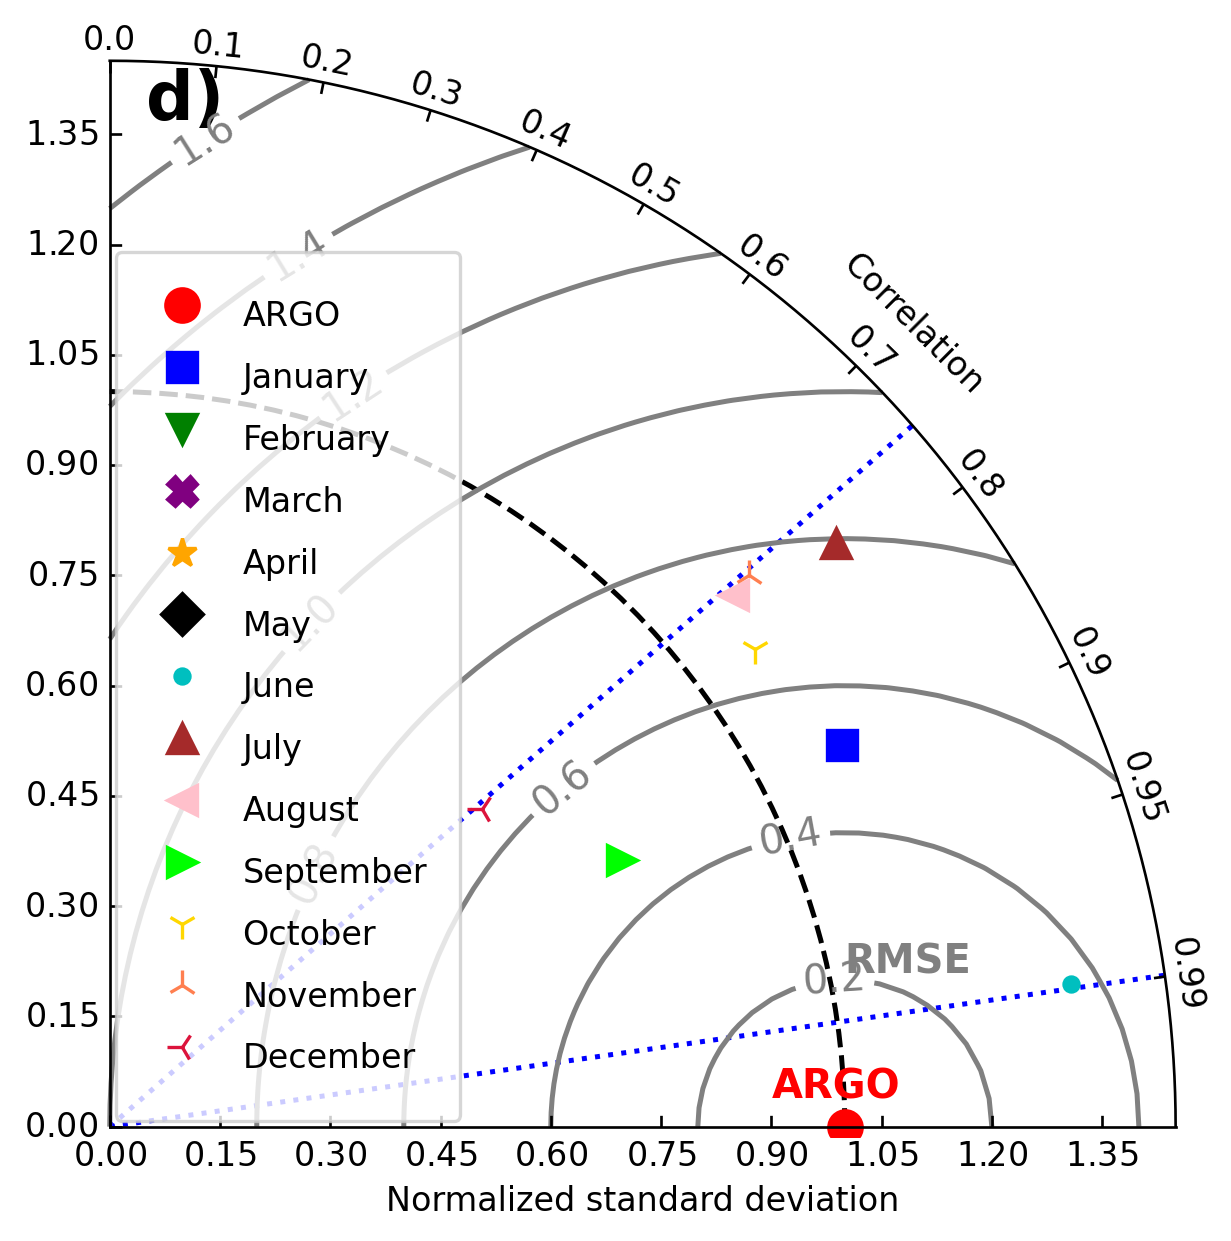

In [17]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0, 1.45), label='ARGO')
ttt=TayDia.add_sample(STD_1, CORR_1, marker='s', linestyle='None', color='b', ms=9,label='January')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_2, CORR_2, marker='v', linestyle='None', color='g', ms=9,label='February')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_3, CORR_3, marker='X', linestyle='None', color='purple', ms=9,label='March')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_4, CORR_4, marker='*', linestyle='None', color='orange', ms=9,label='April')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_5, CORR_5, marker='D', linestyle='None', color='k', ms=9,label='May')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_6, CORR_6, marker='.', linestyle='None', color='c', ms=9,label='June')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_7, CORR_7, marker='^', linestyle='None', color='brown', ms=9,label='July')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_8, CORR_8, marker='<', linestyle='None', color='pink', ms=9,label='August')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_9, CORR_9, marker='>', linestyle='None', color='lime', ms=9,label='September')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_10, CORR_10, marker='1', linestyle='None', color='gold', ms=9,label='October')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_11, CORR_11, marker='2', linestyle='None', color='coral', ms=9,label='November')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_12, CORR_12, marker='3', linestyle='None', color='crimson', ms=9,label='December')#, ax=axs.ravel()[i])
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(prop=dict(size='medium'), loc='lower left',borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05)
#plt.legend(label='JAN',  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.90,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.37,'d)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

In [ ]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Oxigeno_Benguela.csv',sep=",")
dfr

,STD,CORR,RMSE,Mes
0,1.123620,0.886592,0.311810,Ene
1,1.182757,1.205286,0.476451,Feb
2,0.959871,1.317591,0.599043,Mar
3,0.943173,1.115204,0.609696,Abr
4,1.261002,1.376697,0.583898,May
5,1.321760,0.989203,0.411331,Jun
6,1.267439,0.779604,0.287778,Jul
7,1.113966,0.760550,0.153423,Ago
8,0.785631,0.886581,0.613909,Sept
9,1.092545,0.803929,0.073894,Oct


In [ ]:
STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12= dfr.STD.values
CORR_1,CORR_2,CORR_3,CORR_4,CORR_5,CORR_6,CORR_7,CORR_8,CORR_9,CORR_10,CORR_11,CORR_12= dfr.CORR.values
RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7,RMSE_8,RMSE_9,RMSE_10,RMSE_11,RMSE_12= dfr.RMSE.values

In [ ]:
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
COLORES

Text(1.0, 0.21, 'RMSE')

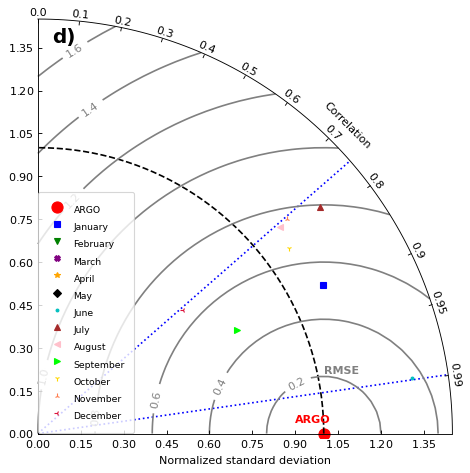

In [ ]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0, 1.45), label='ARGO')
ttt=TayDia.add_sample(STD_1, CORR_1, marker='s', linestyle='None', color='b', ms=5,label='January')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_2, CORR_2, marker='v', linestyle='None', color='g', ms=5,label='February')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_3, CORR_3, marker='X', linestyle='None', color='purple', ms=5,label='March')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_4, CORR_4, marker='*', linestyle='None', color='orange', ms=5,label='April')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_5, CORR_5, marker='D', linestyle='None', color='k', ms=5,label='May')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_6, CORR_6, marker='.', linestyle='None', color='c', ms=5,label='June')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_7, CORR_7, marker='^', linestyle='None', color='brown', ms=5,label='July')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_8, CORR_8, marker='<', linestyle='None', color='pink', ms=5,label='August')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_9, CORR_9, marker='>', linestyle='None', color='lime', ms=5,label='September')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_10, CORR_10, marker='1', linestyle='None', color='gold', ms=5,label='October')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_11, CORR_11, marker='2', linestyle='None', color='coral', ms=5,label='November')#, ax=axs.ravel()[i])
ttt=TayDia.add_sample(STD_12, CORR_12, marker='3', linestyle='None', color='crimson', ms=5,label='December')#, ax=axs.ravel()[i])
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(prop=dict(size='small'), loc='lower left',borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05)
#plt.legend(label='JAN',  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.90,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.37,'d)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')